### Task 1 - Data Collection
Here you will obtain the required data for the analysis. As described in the project instructions, you will perform a web scrap to obtain data from the NCDC website, import data from the John Hopkins repository, and import the provided external data.


### A - NCDC Website scrap
Website - https://covid19.ncdc.gov.ng/

In [1]:
# Write Your Code Below
# Import all libraries in this cell
import requests
import numpy as np
import urllib.request
import time
import datetime as dt
from datetime import timedelta
import pandas as pd
import csv
from bs4 import BeautifulSoup

from urllib.request import urlopen, Request

import re          #for manipulating data expressions

import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')  
import plotly.express as px
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

In [2]:
url = "https://covid19.ncdc.gov.ng/report/"    #open link
UserAgent = Request(url, headers={'User-Agent':'Mozilla/5.0'})
html=urlopen(UserAgent)

In [3]:
soup = BeautifulSoup(html, "lxml")      #you may not add "lxml"; linking BeautifulSoup and the website url for scraping data

In [4]:
title = soup.title    #Trying to look at the title of the website
print(title)          #In HTML format
print(title.text)     #Title in normal text

<title>NCDC Coronavirus COVID-19 Microsite</title>
NCDC Coronavirus COVID-19 Microsite


In [5]:
links = soup.find_all('a')
print(links)

[<a class="nav-link" href="/report/"> <span class="pcoded-micon"><i class="feather icon-home"></i></span><span class="pcoded-mtext">Dashboard</span></a>, <a class="nav-link" href="/state/"><span class="pcoded-micon"><i class="fas fa-chart-bar"></i></span><span class="pcoded-mtext">Epicurve</span></a>, <a class="nav-link" href="/progression/"><span class="pcoded-micon"><i class="feather icon-layout"></i></span><span class="pcoded-mtext">Progression</span></a>, <a class="nav-link" href="/faq/"><span class="pcoded-micon"><i class="feather icon-users"></i></span><span class="pcoded-mtext">FAQs</span></a>, <a class="nav-link" href="/nitpfaq/"><span class="pcoded-micon"><i class="fa fa-plane"></i></span><span class="pcoded-mtext">Travel Portal FAQs</span></a>, <a class="nav-link" href="/advisory/"><span class="pcoded-micon"><i class="feather icon-gitlab"></i></span><span class="pcoded-mtext">Advisory</span></a>, <a class="nav-link" href="/guideline/"><span class="pcoded-micon"><i class="fa f

In [6]:
links = soup.find_all('a', href = True)     #href indicates the destination to links  or particlar websites
for link in links:
    print(link['href'])


/report/
/state/
/progression/
/faq/
/nitpfaq/
/advisory/
/guideline/
/samplesites/
/resource/
#!
/laboratory/
/privatelabs/
/corporatelabs/
#!
/gis/
/gism/
/globals/
https://selfassessment.ncdc.gov.ng
#!
#!
#!
#!
https://ngcovid19resourcetracker.info
/validation/
https://covidtestingcentres.ncdc.gov.ng/
/contact/
https://ncdc.gov.ng/diseases/sitreps/?cat=14&name=An%20update%20of%20COVID-19%20outbreak%20in%20Nigeria
https://covid19blog.ncdc.gov.ng/
https://ncdc.gov.ng/
https://ncdc.gov.ng/diseases/sitreps/?cat=14&name=An%20update%20of%20COVID-19%20outbreak%20in%20Nigeria
https://twitter.com/NCDCgov?ref_src=twsrc%5Etfw
/media/files/Press_Release_-_Relaxation_of_COVID-19_Rules_Ako_221212_210142.pdf
/media/files/F5_-_IMPLEMENTATION_GUIDELINES_Ako.pdf
/media/files/Revised_Travel_protocol_revised_2nd_April_2022.pdf
/media/files/PRIVATE_LABS_TRAVEL_Data.pdf
/media/files/COVID19_private_sector__labs_MLSCN_updated_081121_Ox23ng9.docx
/media/files/COVID19_private_sector__labs_MLSCN_updated_0811

In [7]:
data = []
allrows = soup.find_all("tr")
for row in allrows:
    row_list = row.find_all("td")
    dataRow = []
    #print(row_list)
    for cell in row_list:
        dataRow.append(cell.text)
    data.append(dataRow)
print(data)

[[], ['\nLagos\n', '104,219\n', '1,076\n', '102,372\n', '771\n'], ['\nFCT\n', '29,530\n', '9\n', '29,272\n', '249\n'], ['\nRivers\n', '18,108\n', '-3\n', '17,956\n', '155\n'], ['\nKaduna\n', '11,630\n', '1\n', '11,540\n', '89\n'], ['\nOyo\n', '10,352\n', '0\n', '10,150\n', '202\n'], ['\n Plateau\n', '10,344\n', '4\n', '10,265\n', '75\n'], ['\nEdo\n', '7,927\n', '4\n', '7,601\n', '322\n'], ['\nDelta\n', '5,856\n', '574\n', '5,170\n', '112\n'], ['\nOgun\n', '5,810\n', '11\n', '5,717\n', '82\n'], ['\nKano\n', '5,386\n', '-1\n', '5,260\n', '127\n'], ['\nOndo\n', '5,173\n', '315\n', '4,749\n', '109\n'], ['\nAkwa Ibom\n', '5,010\n', '6\n', '4,960\n', '44\n'], ['\nKwara\n', '4,691\n', '452\n', '4,175\n', '64\n'], ['\nGombe\n', '3,313\n', '8\n', '3,239\n', '66\n'], ['\nOsun\n', '3,311\n', '29\n', '3,190\n', '92\n'], ['\nEnugu\n', '2,952\n', '13\n', '2,910\n', '29\n'], ['\nAnambra\n', '2,825\n', '46\n', '2,760\n', '19\n'], ['\nNasarawa\n', '2,818\n', '434\n', '2,345\n', '39\n'], ['\nImo\n', '2,

In [8]:
df = pd.DataFrame(data)


In [9]:
df

,0,1,2,3,4
0,None,None,None,None,None
1,\nLagos\n,"104,219\n","1,076\n","102,372\n",771\n
2,\nFCT\n,"29,530\n",9\n,"29,272\n",249\n
3,\nRivers\n,"18,108\n",-3\n,"17,956\n",155\n
4,\nKaduna\n,"11,630\n",1\n,"11,540\n",89\n
5,\nOyo\n,"10,352\n",0\n,"10,150\n",202\n
6,\n Plateau\n,"10,344\n",4\n,"10,265\n",75\n
7,\nEdo\n,"7,927\n",4\n,"7,601\n",322\n
8,\nDelta\n,"5,856\n",574\n,"5,170\n",112\n
9,\nOgun\n,"5,810\n",11\n,"5,717\n",82\n


In [10]:
col_headers = soup.find_all('th')     #'th' indicates the headers
col_headers

[<th>States Affected</th>,
 <th>No. of Cases (Lab Confirmed)</th>,
 <th>No. of Cases (on admission)</th>,
 <th>No. Discharged</th>,
 <th>No. of Deaths</th>]

In [11]:
header_list = []
col_headers = soup.find_all('th')     #'th' indicates the headers
for col in col_headers:
    header_list.append(col.text)
print(header_list)

['States Affected', 'No. of Cases (Lab Confirmed)', 'No. of Cases (on admission)', 'No. Discharged', 'No. of Deaths']


In [12]:
df.columns = header_list
df

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
0,None,None,None,None,None
1,\nLagos\n,"104,219\n","1,076\n","102,372\n",771\n
2,\nFCT\n,"29,530\n",9\n,"29,272\n",249\n
3,\nRivers\n,"18,108\n",-3\n,"17,956\n",155\n
4,\nKaduna\n,"11,630\n",1\n,"11,540\n",89\n
5,\nOyo\n,"10,352\n",0\n,"10,150\n",202\n
6,\n Plateau\n,"10,344\n",4\n,"10,265\n",75\n
7,\nEdo\n,"7,927\n",4\n,"7,601\n",322\n
8,\nDelta\n,"5,856\n",574\n,"5,170\n",112\n
9,\nOgun\n,"5,810\n",11\n,"5,717\n",82\n


In [13]:
df["States Affected"] = df["States Affected"].str.replace('\n', " ")

In [14]:
df["No. of Cases (Lab Confirmed)"] = df["No. of Cases (Lab Confirmed)"].str.replace('\n', " ")

In [15]:
df["No. of Cases (on admission)"] = df["No. of Cases (on admission)"].str.replace('\n', " ")

In [16]:
df["No. Discharged"] = df["No. Discharged"].str.replace('\n', " ")

In [17]:
df["No. of Deaths"] = df["No. of Deaths"].str.replace('\n', " ")

### Task 2 - View the data
Obtain basic information about the data using the `head()` and `info()` method.

In [18]:
df

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
0,None,None,None,None,None
1,Lagos,"104,219","1,076","102,372",771
2,FCT,"29,530",9,"29,272",249
3,Rivers,"18,108",-3,"17,956",155
4,Kaduna,"11,630",1,"11,540",89
5,Oyo,"10,352",0,"10,150",202
6,Plateau,"10,344",4,"10,265",75
7,Edo,"7,927",4,"7,601",322
8,Delta,"5,856",574,"5,170",112
9,Ogun,"5,810",11,"5,717",82


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   States Affected               37 non-null     object
 1   No. of Cases (Lab Confirmed)  37 non-null     object
 2   No. of Cases (on admission)   37 non-null     object
 3   No. Discharged                37 non-null     object
 4   No. of Deaths                 37 non-null     object
dtypes: object(5)
memory usage: 1.6+ KB


In [20]:
df.describe()

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
count,37,37,37,37,37
unique,37,37,26,37,31
top,Lagos,"104,219",0,"102,372",28
freq,1,1,8,1,3


In [21]:
df.isnull()

#Checking for Null Values

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
0,True,True,True,True,True
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
5,False,False,False,False,False
6,False,False,False,False,False
7,False,False,False,False,False
8,False,False,False,False,False
9,False,False,False,False,False


In [22]:
df = df.drop(df.index[[0]], axis = 0)

#Dropping the first row in the dataset since it is not needed 

In [23]:
#Saving the Data to a DataFrame object

df

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
1,Lagos,"104,219","1,076","102,372",771
2,FCT,"29,530",9,"29,272",249
3,Rivers,"18,108",-3,"17,956",155
4,Kaduna,"11,630",1,"11,540",89
5,Oyo,"10,352",0,"10,150",202
6,Plateau,"10,344",4,"10,265",75
7,Edo,"7,927",4,"7,601",322
8,Delta,"5,856",574,"5,170",112
9,Ogun,"5,810",11,"5,717",82
10,Kano,"5,386",-1,"5,260",127


### B - John Hopkins Data Repository
Here you will obtain data from the John Hopkins repository. Your task here involves saving the data from the GitHub repo link to DataFrame for further analysis. Find the links below. 
* Global Daily Confirmed Cases - Click [Here](https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv)
* Global Daily Recovered Cases - Click [Here](https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv)
* Global Daily Death Cases - Click [Here](https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv)

In [24]:
#[Write Your Code Here]

Daily_Confirmed = pd.read_csv("C:/Users/oluwa/DATA SCIENCE/Data Science & ML/uStacky Project 2/Nigeria-COVID-19-Data-Analysis-Using-Python/Time-series Datasets COVID-19 Data Analysis/NEW global CONFIRMED cases.csv")
Daily_Recovered = pd.read_csv("C:/Users/oluwa/DATA SCIENCE/Data Science & ML/uStacky Project 2/Nigeria-COVID-19-Data-Analysis-Using-Python/Time-series Datasets COVID-19 Data Analysis/NEW global RECOVERED.csv")

Daily_Deaths = pd.read_csv("C:/Users/oluwa/DATA SCIENCE/Data Science & ML/uStacky Project 2/Nigeria-COVID-19-Data-Analysis-Using-Python/Time-series Datasets COVID-19 Data Analysis/NEW global DEATHS.csv")
#[Write your Code Here]


### Task 3 - Data Cleaning and Preparation
From the information obtained above, you will need to fix the data format. 
<br>
Examples: 
* Convert to appropriate data type.
* Rename the columns of the scraped data.
* Remove comma(,) in numerical data
* Extract daily data for Nigeria from the Global daily cases data

# 1. Daily Confirmed Cases

In [25]:
Daily_Confirmed.head(50)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/13/22,12/14/22,12/15/22,12/16/22,12/17/22,12/18/22,12/19/22,12/20/22,12/21/22,12/22/22
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,206743,206788,206879,206912,206943,207037,207084,207146,207190,207239
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,333567,333591,333613,333635,333635,333650,333653,333686,333708,333708
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,271149,271156,271156,271156,271168,271174,271179,271182,271186,271190
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,47446,47606,47606,47606,47606,47606,47606,47686,47686,47686
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,104808,104946,104946,104946,104946,104946,104946,104946,104973,104973
5,NaN,Antarctica,-71.949900,23.347000,0,0,0,0,0,0,...,11,11,11,11,11,11,11,11,11,11
6,NaN,Antigua and Barbuda,17.060800,-61.796400,0,0,0,0,0,0,...,9106,9106,9106,9106,9106,9106,9106,9106,9106,9106
7,NaN,Argentina,-38.416100,-63.616700,0,0,0,0,0,0,...,9766975,9766975,9766975,9766975,9766975,9766975,9829236,9829236,9829236,9829236
8,NaN,Armenia,40.069100,45.038200,0,0,0,0,0,0,...,445881,445881,445881,445881,445881,445881,445881,445881,445881,445881
9,Australian Capital Territory,Australia,-35.473500,149.012400,0,0,0,0,0,0,...,218698,218698,221718,221718,221718,221718,221718,221718,221718,224902


In [26]:
Daily_Confirmed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Columns: 1070 entries, Province/State to 12/22/22
dtypes: float64(2), int64(1066), object(2)
memory usage: 2.4+ MB


In [27]:
Daily_Confirmed['Country/Region'].unique()

#The list of all countries in the dataset

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antarctica', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana',
       'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Gua

In [28]:
Daily_Confirmed.describe()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,12/13/22,12/14/22,12/15/22,12/16/22,12/17/22,12/18/22,12/19/22,12/20/22,12/21/22,12/22/22
count,287.000000,287.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,...,2.890000e+02,2.890000e+02,2.890000e+02,2.890000e+02,2.890000e+02,2.890000e+02,2.890000e+02,2.890000e+02,2.890000e+02,2.890000e+02
mean,19.718719,22.182084,1.927336,2.273356,3.266436,4.972318,7.335640,10.134948,19.307958,21.346021,...,2.250792e+06,2.253159e+06,2.255741e+06,2.258253e+06,2.259292e+06,2.260270e+06,2.262364e+06,2.264798e+06,2.267235e+06,2.269814e+06
std,25.956609,77.870931,26.173664,26.270191,32.707271,45.523871,63.623197,85.724481,210.329649,211.628535,...,8.161094e+06,8.172612e+06,8.182588e+06,8.191238e+06,8.193963e+06,8.196008e+06,8.203777e+06,8.212876e+06,8.225226e+06,8.234458e+06
min,-71.949900,-178.116500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.072192,-32.823050,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.198100e+04,1.198100e+04,1.198100e+04,1.198100e+04,1.198100e+04,1.198100e+04,1.198100e+04,1.198200e+04,1.202300e+04,1.202300e+04
50%,21.512583,20.939400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,9.709700e+04,9.709700e+04,9.709700e+04,9.752600e+04,9.752600e+04,9.752600e+04,9.752600e+04,9.752600e+04,9.752600e+04,9.752600e+04
75%,40.401784,89.224350,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.024914e+06,1.024914e+06,1.024914e+06,1.024914e+06,1.024914e+06,1.024914e+06,1.024914e+06,1.024914e+06,1.024914e+06,1.031449e+06
max,71.706900,178.065000,444.000000,444.000000,549.000000,761.000000,1058.000000,1423.000000,3554.000000,3554.000000,...,9.957682e+07,9.972481e+07,9.983668e+07,9.989144e+07,9.989804e+07,9.990297e+07,9.996118e+07,1.000403e+08,1.002106e+08,1.003046e+08


In [29]:
Daily_Confirmed.isnull()

#Checking for null values

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/13/22,12/14/22,12/15/22,12/16/22,12/17/22,12/18/22,12/19/22,12/20/22,12/21/22,12/22/22
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
285,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
286,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
287,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [30]:

Daily_Confirmed.isnull().sum()

Province/State    198
Country/Region      0
Lat                 2
Long                2
1/22/20             0
                 ... 
12/18/22            0
12/19/22            0
12/20/22            0
12/21/22            0
12/22/22            0
Length: 1070, dtype: int64

In [31]:


Daily_Confirmed.rename(columns = {'Country/Region':'Country'}, inplace = True)

In [32]:
Daily_Confirmed

,Province/State,Country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/13/22,12/14/22,12/15/22,12/16/22,12/17/22,12/18/22,12/19/22,12/20/22,12/21/22,12/22/22
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,206743,206788,206879,206912,206943,207037,207084,207146,207190,207239
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,333567,333591,333613,333635,333635,333650,333653,333686,333708,333708
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,271149,271156,271156,271156,271168,271174,271179,271182,271186,271190
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,47446,47606,47606,47606,47606,47606,47606,47686,47686,47686
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,104808,104946,104946,104946,104946,104946,104946,104946,104973,104973
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,703228,703228,703228,703228,703228,703228,703228,703228,703228,703228
285,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,535
286,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,11945,11945,11945,11945,11945,11945,11945,11945,11945,11945
287,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,333746,333746,333746,333746,333746,333746,333746,333746,333746,333905


In [33]:
Daily_Confirmed.columns

Index(['Province/State', 'Country', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '12/13/22', '12/14/22', '12/15/22', '12/16/22', '12/17/22', '12/18/22',
       '12/19/22', '12/20/22', '12/21/22', '12/22/22'],
      dtype='object', length=1070)

In [34]:
dates = Daily_Confirmed.columns[4:]

Daily_Confirmed_Final = Daily_Confirmed.melt(id_vars=['Country','Lat','Long'], value_vars=dates,var_name='Date',value_name='Confirmed')



In [35]:
Daily_Confirmed_Final.head()

,Country,Lat,Long,Date,Confirmed
0,Afghanistan,33.93911,67.709953,1/22/20,0
1,Albania,41.15330,20.168300,1/22/20,0
2,Algeria,28.03390,1.659600,1/22/20,0
3,Andorra,42.50630,1.521800,1/22/20,0
4,Angola,-11.20270,17.873900,1/22/20,0


In [36]:
Nigeria_Daily_Confirmed = Daily_Confirmed_Final[Daily_Confirmed_Final['Country'] == 'Nigeria']

#Finding Nigeria cases

In [37]:
Nigeria_Daily_Confirmed.head()

,Country,Lat,Long,Date,Confirmed
206,Nigeria,9.082,8.6753,1/22/20,0
495,Nigeria,9.082,8.6753,1/23/20,0
784,Nigeria,9.082,8.6753,1/24/20,0
1073,Nigeria,9.082,8.6753,1/25/20,0
1362,Nigeria,9.082,8.6753,1/26/20,0


In [38]:
Nigeria_Daily_Confirmed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1066 entries, 206 to 307991
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    1066 non-null   object 
 1   Lat        1066 non-null   float64
 2   Long       1066 non-null   float64
 3   Date       1066 non-null   object 
 4   Confirmed  1066 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 50.0+ KB


In [39]:
Nigeria_Daily_Confirmed.describe()

,Lat,Long,Confirmed
count,1.066000e+03,1.066000e+03,1066.000000
mean,9.082000e+00,8.675300e+00,157393.886492
std,1.777191e-13,2.132629e-14,96125.136759
min,9.082000e+00,8.675300e+00,0.000000
25%,9.082000e+00,8.675300e+00,60871.000000
50%,9.082000e+00,8.675300e+00,168183.000000
75%,9.082000e+00,8.675300e+00,255415.000000
max,9.082000e+00,8.675300e+00,266381.000000


In [40]:
Nigeria_Daily_Confirmed.isnull()

,Country,Lat,Long,Date,Confirmed
206,False,False,False,False,False
495,False,False,False,False,False
784,False,False,False,False,False
1073,False,False,False,False,False
1362,False,False,False,False,False
...,...,...,...,...,...
306835,False,False,False,False,False
307124,False,False,False,False,False
307413,False,False,False,False,False
307702,False,False,False,False,False


In [41]:
Nigeria_Daily_Confirmed.isnull().sum()

Country      0
Lat          0
Long         0
Date         0
Confirmed    0
dtype: int64

# Extracted Cases for the Daily Confirmed in Nigeria

In [42]:
Nigeria_Daily_Confirmed

,Country,Lat,Long,Date,Confirmed
206,Nigeria,9.082,8.6753,1/22/20,0
495,Nigeria,9.082,8.6753,1/23/20,0
784,Nigeria,9.082,8.6753,1/24/20,0
1073,Nigeria,9.082,8.6753,1/25/20,0
1362,Nigeria,9.082,8.6753,1/26/20,0
...,...,...,...,...,...
306835,Nigeria,9.082,8.6753,12/18/22,266381
307124,Nigeria,9.082,8.6753,12/19/22,266381
307413,Nigeria,9.082,8.6753,12/20/22,266381
307702,Nigeria,9.082,8.6753,12/21/22,266381


# 2. Daily Recovered Cases

In [43]:
Daily_Recovered.head(30)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/13/22,12/14/22,12/15/22,12/16/22,12/17/22,12/18/22,12/19/22,12/20/22,12/21/22,12/22/22
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,NaN,Antarctica,-71.949900,23.347000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,NaN,Antigua and Barbuda,17.060800,-61.796400,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,NaN,Argentina,-38.416100,-63.616700,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,NaN,Armenia,40.069100,45.038200,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,Australian Capital Territory,Australia,-35.473500,149.012400,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
Daily_Recovered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274 entries, 0 to 273
Columns: 1070 entries, Province/State to 12/22/22
dtypes: float64(2), int64(1066), object(2)
memory usage: 2.2+ MB


In [45]:
Daily_Recovered.describe()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,12/13/22,12/14/22,12/15/22,12/16/22,12/17/22,12/18/22,12/19/22,12/20/22,12/21/22,12/22/22
count,273.000000,273.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,...,274.0,274.0,274.0,274.0,274.0,274.0,274.0,274.0,274.0,274.0
mean,18.318242,27.325980,0.109489,0.116788,0.142336,0.153285,0.204380,0.237226,0.394161,0.463504,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,25.442128,75.783947,1.695410,1.699238,1.886378,1.949511,2.568159,2.761311,4.866508,5.352804,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,-71.949900,-178.116500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,3.919300,-9.696600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,19.195900,23.881300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,39.074200,95.995600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,71.706900,178.065000,28.000000,28.000000,31.000000,32.000000,42.000000,45.000000,80.000000,88.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:
Daily_Recovered.rename(columns = {'Country/Region':'Country'}, inplace = True)

In [47]:
Daily_Recovered['Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antarctica', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana',
       'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Gua

In [48]:
Daily_Recovered.isnull()

,Province/State,Country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/13/22,12/14/22,12/15/22,12/16/22,12/17/22,12/18/22,12/19/22,12/20/22,12/21/22,12/22/22
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
270,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
271,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
272,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [49]:
Daily_Recovered.isnull().sum()

Province/State    199
Country             0
Lat                 1
Long                1
1/22/20             0
                 ... 
12/18/22            0
12/19/22            0
12/20/22            0
12/21/22            0
12/22/22            0
Length: 1070, dtype: int64

In [50]:
Daily_Recovered.columns

Index(['Province/State', 'Country', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '12/13/22', '12/14/22', '12/15/22', '12/16/22', '12/17/22', '12/18/22',
       '12/19/22', '12/20/22', '12/21/22', '12/22/22'],
      dtype='object', length=1070)

In [51]:
Daily_Recovered_Final = Daily_Recovered.melt(id_vars=['Country','Lat','Long'],value_vars=dates,var_name='Date',value_name='Recovered')



In [52]:
Daily_Recovered_Final.head()

,Country,Lat,Long,Date,Recovered
0,Afghanistan,33.93911,67.709953,1/22/20,0
1,Albania,41.15330,20.168300,1/22/20,0
2,Algeria,28.03390,1.659600,1/22/20,0
3,Andorra,42.50630,1.521800,1/22/20,0
4,Angola,-11.20270,17.873900,1/22/20,0


In [53]:
Nigeria_Daily_Recovered = Daily_Recovered_Final[Daily_Recovered_Final['Country'] == 'Nigeria']

In [54]:
Nigeria_Daily_Recovered.head()

,Country,Lat,Long,Date,Recovered
191,Nigeria,9.082,8.6753,1/22/20,0
465,Nigeria,9.082,8.6753,1/23/20,0
739,Nigeria,9.082,8.6753,1/24/20,0
1013,Nigeria,9.082,8.6753,1/25/20,0
1287,Nigeria,9.082,8.6753,1/26/20,0


In [55]:
Nigeria_Daily_Recovered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1066 entries, 191 to 292001
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    1066 non-null   object 
 1   Lat        1066 non-null   float64
 2   Long       1066 non-null   float64
 3   Date       1066 non-null   object 
 4   Recovered  1066 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 50.0+ KB


In [56]:
Nigeria_Daily_Recovered.describe()

,Lat,Long,Recovered
count,1.066000e+03,1.066000e+03,1066.000000
mean,9.082000e+00,8.675300e+00,37046.985929
std,1.777191e-13,2.132629e-14,57458.810255
min,9.082000e+00,8.675300e+00,0.000000
25%,9.082000e+00,8.675300e+00,0.000000
50%,9.082000e+00,8.675300e+00,0.000000
75%,9.082000e+00,8.675300e+00,60636.000000
max,9.082000e+00,8.675300e+00,165208.000000


In [57]:
Nigeria_Daily_Recovered.isnull()

,Country,Lat,Long,Date,Recovered
191,False,False,False,False,False
465,False,False,False,False,False
739,False,False,False,False,False
1013,False,False,False,False,False
1287,False,False,False,False,False
...,...,...,...,...,...
290905,False,False,False,False,False
291179,False,False,False,False,False
291453,False,False,False,False,False
291727,False,False,False,False,False


In [58]:
Nigeria_Daily_Recovered.isnull().sum()

Country      0
Lat          0
Long         0
Date         0
Recovered    0
dtype: int64

# Extracted Cases for the Daily Recovered in Nigeria

In [59]:
Nigeria_Daily_Recovered

,Country,Lat,Long,Date,Recovered
191,Nigeria,9.082,8.6753,1/22/20,0
465,Nigeria,9.082,8.6753,1/23/20,0
739,Nigeria,9.082,8.6753,1/24/20,0
1013,Nigeria,9.082,8.6753,1/25/20,0
1287,Nigeria,9.082,8.6753,1/26/20,0
...,...,...,...,...,...
290905,Nigeria,9.082,8.6753,12/18/22,0
291179,Nigeria,9.082,8.6753,12/19/22,0
291453,Nigeria,9.082,8.6753,12/20/22,0
291727,Nigeria,9.082,8.6753,12/21/22,0


# 3. Daily Death Cases

In [60]:
Daily_Deaths.head(50)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/13/22,12/14/22,12/15/22,12/16/22,12/17/22,12/18/22,12/19/22,12/20/22,12/21/22,12/22/22
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,7843,7843,7843,7843,7844,7845,7845,7845,7845,7845
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,3594,3594,3594,3594,3594,3594,3594,3594,3594,3594
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,158,158,158,158,158,158,158,165,165,165
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,1925,1928,1928,1928,1928,1928,1928,1928,1928,1928
5,NaN,Antarctica,-71.949900,23.347000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,NaN,Antigua and Barbuda,17.060800,-61.796400,0,0,0,0,0,0,...,146,146,146,146,146,146,146,146,146,146
7,NaN,Argentina,-38.416100,-63.616700,0,0,0,0,0,0,...,130041,130041,130041,130041,130041,130041,130080,130080,130080,130080
8,NaN,Armenia,40.069100,45.038200,0,0,0,0,0,0,...,8712,8712,8712,8712,8712,8712,8712,8712,8712,8712
9,Australian Capital Territory,Australia,-35.473500,149.012400,0,0,0,0,0,0,...,135,135,136,136,136,136,136,136,136,138


In [61]:
Daily_Deaths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Columns: 1070 entries, Province/State to 12/22/22
dtypes: float64(2), int64(1066), object(2)
memory usage: 2.4+ MB


In [62]:
Daily_Deaths.describe()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,12/13/22,12/14/22,12/15/22,12/16/22,12/17/22,12/18/22,12/19/22,12/20/22,12/21/22,12/22/22
count,287.000000,287.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,...,2.890000e+02,2.890000e+02,2.890000e+02,2.890000e+02,2.890000e+02,2.890000e+02,2.890000e+02,2.890000e+02,2.890000e+02,2.890000e+02
mean,19.718719,22.182084,0.058824,0.062284,0.089965,0.145329,0.193772,0.283737,0.453287,0.460208,...,2.303481e+04,2.304332e+04,2.305223e+04,2.306124e+04,2.306369e+04,2.306602e+04,2.307191e+04,2.307925e+04,2.308761e+04,2.309677e+04
std,25.956609,77.870931,1.000000,1.001525,1.413797,2.353998,3.060245,4.471644,7.353103,7.353616,...,9.143087e+04,9.147922e+04,9.151696e+04,9.154582e+04,9.154859e+04,9.155006e+04,9.157027e+04,9.160262e+04,9.165158e+04,9.168376e+04
min,-71.949900,-178.116500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.072192,-32.823050,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,6.300000e+01,6.300000e+01,6.300000e+01,6.300000e+01,6.300000e+01,6.300000e+01,6.300000e+01,6.300000e+01,6.300000e+01,6.300000e+01
50%,21.512583,20.939400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,8.780000e+02,8.780000e+02,8.780000e+02,8.780000e+02,8.780000e+02,8.780000e+02,8.780000e+02,8.780000e+02,8.780000e+02,8.780000e+02
75%,40.401784,89.224350,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,8.530000e+03,8.530000e+03,8.530000e+03,8.530000e+03,8.530000e+03,8.530000e+03,8.530000e+03,8.530000e+03,8.530000e+03,8.530000e+03
max,71.706900,178.065000,17.000000,17.000000,24.000000,40.000000,52.000000,76.000000,125.000000,125.000000,...,1.085480e+06,1.086423e+06,1.087159e+06,1.087571e+06,1.087583e+06,1.087583e+06,1.087845e+06,1.088409e+06,1.089433e+06,1.090014e+06


In [63]:
Daily_Deaths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Columns: 1070 entries, Province/State to 12/22/22
dtypes: float64(2), int64(1066), object(2)
memory usage: 2.4+ MB


In [64]:
Daily_Deaths.rename(columns = {'Country/Region':'Country', 'Last_Update':'Date'}, inplace = True)

In [65]:
Daily_Deaths['Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antarctica', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana',
       'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Gua

In [66]:
Daily_Deaths.isnull()

,Province/State,Country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/13/22,12/14/22,12/15/22,12/16/22,12/17/22,12/18/22,12/19/22,12/20/22,12/21/22,12/22/22
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
285,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
286,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
287,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [67]:
Daily_Deaths.isnull().sum()

Province/State    198
Country             0
Lat                 2
Long                2
1/22/20             0
                 ... 
12/18/22            0
12/19/22            0
12/20/22            0
12/21/22            0
12/22/22            0
Length: 1070, dtype: int64

In [68]:
Daily_Deaths.columns

Index(['Province/State', 'Country', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '12/13/22', '12/14/22', '12/15/22', '12/16/22', '12/17/22', '12/18/22',
       '12/19/22', '12/20/22', '12/21/22', '12/22/22'],
      dtype='object', length=1070)

In [69]:
Daily_Deaths_Final = Daily_Deaths.melt(id_vars=['Country','Lat','Long'],value_vars=dates,var_name='Date',value_name='Deaths')



In [70]:
Daily_Deaths_Final.head()

,Country,Lat,Long,Date,Deaths
0,Afghanistan,33.93911,67.709953,1/22/20,0
1,Albania,41.15330,20.168300,1/22/20,0
2,Algeria,28.03390,1.659600,1/22/20,0
3,Andorra,42.50630,1.521800,1/22/20,0
4,Angola,-11.20270,17.873900,1/22/20,0


In [71]:
Nigeria_Daily_Deaths = Daily_Deaths_Final[Daily_Deaths_Final['Country'] == 'Nigeria']

In [72]:
Nigeria_Daily_Deaths.head()

,Country,Lat,Long,Date,Deaths
206,Nigeria,9.082,8.6753,1/22/20,0
495,Nigeria,9.082,8.6753,1/23/20,0
784,Nigeria,9.082,8.6753,1/24/20,0
1073,Nigeria,9.082,8.6753,1/25/20,0
1362,Nigeria,9.082,8.6753,1/26/20,0


# Extracted Cases for the Daily Death Cases in Nigeria

In [73]:
Nigeria_Daily_Deaths

,Country,Lat,Long,Date,Deaths
206,Nigeria,9.082,8.6753,1/22/20,0
495,Nigeria,9.082,8.6753,1/23/20,0
784,Nigeria,9.082,8.6753,1/24/20,0
1073,Nigeria,9.082,8.6753,1/25/20,0
1362,Nigeria,9.082,8.6753,1/26/20,0
...,...,...,...,...,...
306835,Nigeria,9.082,8.6753,12/18/22,3155
307124,Nigeria,9.082,8.6753,12/19/22,3155
307413,Nigeria,9.082,8.6753,12/20/22,3155
307702,Nigeria,9.082,8.6753,12/21/22,3155


In [74]:
# Merging data

Global_Extracted = pd.merge(Daily_Confirmed_Final, Daily_Recovered_Final, on = ['Country','Lat','Long','Date'], how='left')

Final_Global =pd.merge(Global_Extracted, Daily_Deaths_Final, on = ['Country','Lat','Long','Date'], how='left')

In [75]:
Final_Global.head()

,Country,Lat,Long,Date,Confirmed,Recovered,Deaths
0,Afghanistan,33.93911,67.709953,1/22/20,0,0.0,0
1,Albania,41.15330,20.168300,1/22/20,0,0.0,0
2,Algeria,28.03390,1.659600,1/22/20,0,0.0,0
3,Andorra,42.50630,1.521800,1/22/20,0,0.0,0
4,Angola,-11.20270,17.873900,1/22/20,0,0.0,0


In [76]:
# Conversion to standard DateTime feature
Final_Global['Date'] = pd.to_datetime(Final_Global['Date'])

In [77]:
Final_Global.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 310206 entries, 0 to 310205
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Country    310206 non-null  object        
 1   Lat        308074 non-null  float64       
 2   Long       308074 non-null  float64       
 3   Date       310206 non-null  datetime64[ns]
 4   Confirmed  310206 non-null  int64         
 5   Recovered  286754 non-null  float64       
 6   Deaths     310206 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 18.9+ MB


In [78]:
Final_Global.describe()

,Lat,Long,Confirmed,Recovered,Deaths
count,308074.000000,308074.000000,3.102060e+05,2.867540e+05,3.102060e+05
mean,19.582257,22.028574,8.555946e+05,8.093755e+04,1.255953e+04
std,25.873269,77.487652,4.474544e+06,7.347320e+05,6.104310e+04
min,-71.949900,-178.116500,0.000000e+00,-1.000000e+00,0.000000e+00
25%,3.919300,-23.041800,4.970000e+02,0.000000e+00,3.000000e+00
50%,21.007900,20.902977,1.177400e+04,0.000000e+00,1.260000e+02
75%,40.339900,88.092400,1.990070e+05,1.233000e+03,2.685000e+03
max,71.706900,178.065000,1.003046e+08,3.097475e+07,1.090014e+06


In [79]:
Final_Global.isnull()

,Country,Lat,Long,Date,Confirmed,Recovered,Deaths
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
310201,False,False,False,False,False,False,False
310202,False,False,False,False,False,False,False
310203,False,False,False,False,False,False,False
310204,False,False,False,False,False,False,False


In [80]:
Final_Global.isnull().sum()

Country          0
Lat           2132
Long          2132
Date             0
Confirmed        0
Recovered    23452
Deaths           0
dtype: int64

In [81]:
# Creation of another feature called active cases

Final_Global['Active Cases'] = Final_Global['Confirmed'] - Final_Global['Recovered'] - Final_Global['Deaths']

In [82]:
Final_Global.tail(20)

,Country,Lat,Long,Date,Confirmed,Recovered,Deaths,Active Cases
310186,United Kingdom,-51.796300,-59.523600,2022-12-22,1930,0.0,0,1930.0
310187,United Kingdom,36.140800,-5.353600,2022-12-22,20252,0.0,110,20142.0
310188,United Kingdom,49.448196,-2.589490,2022-12-22,33910,0.0,66,33844.0
310189,United Kingdom,54.236100,-4.548100,2022-12-22,38008,0.0,116,37892.0
310190,United Kingdom,49.213800,-2.135800,2022-12-22,64316,0.0,144,64172.0
310191,United Kingdom,16.742498,-62.187366,2022-12-22,1403,0.0,8,1395.0
310192,United Kingdom,-24.376800,-128.324200,2022-12-22,4,0.0,0,4.0
310193,United Kingdom,-7.946700,-14.355900,2022-12-22,2166,0.0,0,2166.0
310194,United Kingdom,21.694000,-71.797900,2022-12-22,6479,0.0,36,6443.0
310195,United Kingdom,55.378100,-3.436000,2022-12-22,24135080,0.0,213249,23921831.0


In [83]:
Final_Global_Nations = Final_Global.set_index(['Country'])

In [84]:
# Extracting nigeria cases

Nigeria = Final_Global_Nations.loc['Nigeria']

In [85]:
Nigeria.head()

,Lat,Long,Date,Confirmed,Recovered,Deaths,Active Cases
Country,,,,,,,
Nigeria,9.082,8.6753,2020-01-22,0,0.0,0,0.0
Nigeria,9.082,8.6753,2020-01-23,0,0.0,0,0.0
Nigeria,9.082,8.6753,2020-01-24,0,0.0,0,0.0
Nigeria,9.082,8.6753,2020-01-25,0,0.0,0,0.0
Nigeria,9.082,8.6753,2020-01-26,0,0.0,0,0.0


In [86]:
Nigeria.shape

(1066, 7)

In [87]:
Nigeria.tail(50)

,Lat,Long,Date,Confirmed,Recovered,Deaths,Active Cases
Country,,,,,,,
Nigeria,9.082,8.6753,2022-11-03,266138,0.0,3155,262983.0
Nigeria,9.082,8.6753,2022-11-04,266138,0.0,3155,262983.0
Nigeria,9.082,8.6753,2022-11-05,266192,0.0,3155,263037.0
Nigeria,9.082,8.6753,2022-11-06,266192,0.0,3155,263037.0
Nigeria,9.082,8.6753,2022-11-07,266192,0.0,3155,263037.0
Nigeria,9.082,8.6753,2022-11-08,266192,0.0,3155,263037.0
Nigeria,9.082,8.6753,2022-11-09,266192,0.0,3155,263037.0
Nigeria,9.082,8.6753,2022-11-10,266192,0.0,3155,263037.0
Nigeria,9.082,8.6753,2022-11-11,266192,0.0,3155,263037.0


In [88]:
Nigeria.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1066 entries, Nigeria to Nigeria
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Lat           1066 non-null   float64       
 1   Long          1066 non-null   float64       
 2   Date          1066 non-null   datetime64[ns]
 3   Confirmed     1066 non-null   int64         
 4   Recovered     1066 non-null   float64       
 5   Deaths        1066 non-null   int64         
 6   Active Cases  1066 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(2)
memory usage: 66.6+ KB


In [89]:
Nigeria.describe()

,Lat,Long,Confirmed,Recovered,Deaths,Active Cases
count,1.066000e+03,1.066000e+03,1066.000000,1066.000000,1066.000000,1066.000000
mean,9.082000e+00,8.675300e+00,157393.886492,37046.985929,2025.502814,118321.397749
std,1.777191e-13,2.132629e-14,96125.136759,57458.810255,1110.687193,117553.594695
min,9.082000e+00,8.675300e+00,0.000000,0.000000,0.000000,0.000000
25%,9.082000e+00,8.675300e+00,60871.000000,0.000000,1116.000000,7225.500000
50%,9.082000e+00,8.675300e+00,168183.000000,0.000000,2122.000000,22529.500000
75%,9.082000e+00,8.675300e+00,255415.000000,60636.000000,3142.000000,252273.000000
max,9.082000e+00,8.675300e+00,266381.000000,165208.000000,3155.000000,263226.000000


In [90]:
#[Write Your Code Here]

Covid_Ext = pd.read_csv("C:/Users/oluwa/DATA SCIENCE/Data Science & ML/uStacky Project 2/Nigeria-COVID-19-Data-Analysis-Using-Python/covid_external.csv")

Budget_Data = pd.read_csv("C:/Users/oluwa/DATA SCIENCE/Data Science & ML/uStacky Project 2/Nigeria-COVID-19-Data-Analysis-Using-Python/Budget data.csv")

RealGDP_Data = pd.read_csv("C:/Users/oluwa/DATA SCIENCE/Data Science & ML/uStacky Project 2/Nigeria-COVID-19-Data-Analysis-Using-Python/RealGDP.csv")

Covidnig = pd.read_csv("C:/Users/oluwa/DATA SCIENCE/Data Science & ML/uStacky Project 2/Nigeria-COVID-19-Data-Analysis-Using-Python/covidnig.csv")
#[Write your Code Here]


# Forthe external Datasets: 1. Rename the columns conveniently 2. Rename the 'state' columns the same way 3. Arrange the 'state' columns alpahbetically 4. Remove comma from figures 5. combine the datasets


In [91]:
Covid_Ext

,states,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR
0,FCT,North Central,4865000,0.3,0.0,0.9,0.4,0.6,0.9,0.6,0.2,0.79
1,Plateau,North Central,4766000,0.4,0.5,0.4,0.8,0.3,0.3,0.5,0.3,0.93
2,Kwara,North Central,3524000,0.3,0.4,0.3,0.2,0.4,0.2,0.6,0.7,0.93
3,Nassarawa,North Central,2783000,0.1,0.3,0.5,0.9,0.0,0.1,0.6,0.5,0.85
4,Niger,North Central,6260000,0.6,0.0,0.6,0.3,0.7,0.1,0.8,0.8,0.84
5,Benue,North Central,6376000,0.5,0.7,0.5,0.7,0.4,0.4,0.3,0.5,0.91
6,Kogi,North Central,4970000,0.1,0.3,0.2,0.5,0.5,0.4,0.3,0.6,0.87
7,Bauchi,North East,7270000,0.8,0.1,0.2,0.8,0.8,0.2,0.8,0.8,0.85
8,Gombe,North East,3692000,1.0,0.4,0.4,0.9,0.9,0.3,0.8,0.7,0.83
9,Borno,North East,6651000,0.9,0.3,0.1,1.0,1.0,0.1,0.7,0.9,0.89


In [92]:
Covid_Ext.head()

,states,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR
0,FCT,North Central,4865000,0.3,0.0,0.9,0.4,0.6,0.9,0.6,0.2,0.79
1,Plateau,North Central,4766000,0.4,0.5,0.4,0.8,0.3,0.3,0.5,0.3,0.93
2,Kwara,North Central,3524000,0.3,0.4,0.3,0.2,0.4,0.2,0.6,0.7,0.93
3,Nassarawa,North Central,2783000,0.1,0.3,0.5,0.9,0.0,0.1,0.6,0.5,0.85
4,Niger,North Central,6260000,0.6,0.0,0.6,0.3,0.7,0.1,0.8,0.8,0.84


In [93]:
Covid_Ext.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   states                   37 non-null     object 
 1   region                   37 non-null     object 
 2   Population               37 non-null     int64  
 3   Overall CCVI Index       37 non-null     float64
 4   Age                      37 non-null     float64
 5   Epidemiological          37 non-null     float64
 6   Fragility                37 non-null     float64
 7   Health System            37 non-null     float64
 8   Population Density       37 non-null     float64
 9   Socio-Economic           37 non-null     float64
 10   Transport Availability  37 non-null     float64
 11  Acute IHR                37 non-null     float64
dtypes: float64(9), int64(1), object(2)
memory usage: 3.6+ KB


In [94]:
Covid_Ext.describe()

,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR
count,3.700000e+01,37.000000,37.000000,37.000000,37.000000,37.000000,37.0,37.000000,37.000000,37.000000
mean,5.843892e+06,0.502703,0.502703,0.500000,0.502703,0.502703,0.5,0.502703,0.502703,0.954054
std,2.622344e+06,0.301373,0.301373,0.299073,0.301373,0.301373,0.3,0.301373,0.301373,0.100539
min,2.606000e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.790000
25%,4.272000e+06,0.300000,0.300000,0.300000,0.300000,0.300000,0.3,0.300000,0.300000,0.870000
50%,5.185000e+06,0.500000,0.500000,0.500000,0.500000,0.500000,0.5,0.500000,0.500000,0.930000
75%,6.376000e+06,0.800000,0.800000,0.700000,0.800000,0.800000,0.8,0.800000,0.800000,1.040000
max,1.472600e+07,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.140000


In [95]:
Covid_Ext.rename(columns = {'states':'States', 'Overall CCVI Index':'Overall_CCVI_Index', 'Health System':'Health_System', 
                            'Population Density':'Population_Density', 'Socio-Economic':'Socio_Economic', 
                            'Transport Availability':'Transport_Availability', 'Acute IHR':'Acute_IHR' }, inplace = True)

In [96]:
Covid_Ext.head(10)

,States,region,Population,Overall_CCVI_Index,Age,Epidemiological,Fragility,Health_System,Population_Density,Socio_Economic,Transport Availability,Acute_IHR
0,FCT,North Central,4865000,0.3,0.0,0.9,0.4,0.6,0.9,0.6,0.2,0.79
1,Plateau,North Central,4766000,0.4,0.5,0.4,0.8,0.3,0.3,0.5,0.3,0.93
2,Kwara,North Central,3524000,0.3,0.4,0.3,0.2,0.4,0.2,0.6,0.7,0.93
3,Nassarawa,North Central,2783000,0.1,0.3,0.5,0.9,0.0,0.1,0.6,0.5,0.85
4,Niger,North Central,6260000,0.6,0.0,0.6,0.3,0.7,0.1,0.8,0.8,0.84
5,Benue,North Central,6376000,0.5,0.7,0.5,0.7,0.4,0.4,0.3,0.5,0.91
6,Kogi,North Central,4970000,0.1,0.3,0.2,0.5,0.5,0.4,0.3,0.6,0.87
7,Bauchi,North East,7270000,0.8,0.1,0.2,0.8,0.8,0.2,0.8,0.8,0.85
8,Gombe,North East,3692000,1.0,0.4,0.4,0.9,0.9,0.3,0.8,0.7,0.83
9,Borno,North East,6651000,0.9,0.3,0.1,1.0,1.0,0.1,0.7,0.9,0.89


In [97]:

Covid_Ext

,States,region,Population,Overall_CCVI_Index,Age,Epidemiological,Fragility,Health_System,Population_Density,Socio_Economic,Transport Availability,Acute_IHR
0,FCT,North Central,4865000,0.3,0.0,0.9,0.4,0.6,0.9,0.6,0.2,0.79
1,Plateau,North Central,4766000,0.4,0.5,0.4,0.8,0.3,0.3,0.5,0.3,0.93
2,Kwara,North Central,3524000,0.3,0.4,0.3,0.2,0.4,0.2,0.6,0.7,0.93
3,Nassarawa,North Central,2783000,0.1,0.3,0.5,0.9,0.0,0.1,0.6,0.5,0.85
4,Niger,North Central,6260000,0.6,0.0,0.6,0.3,0.7,0.1,0.8,0.8,0.84
5,Benue,North Central,6376000,0.5,0.7,0.5,0.7,0.4,0.4,0.3,0.5,0.91
6,Kogi,North Central,4970000,0.1,0.3,0.2,0.5,0.5,0.4,0.3,0.6,0.87
7,Bauchi,North East,7270000,0.8,0.1,0.2,0.8,0.8,0.2,0.8,0.8,0.85
8,Gombe,North East,3692000,1.0,0.4,0.4,0.9,0.9,0.3,0.8,0.7,0.83
9,Borno,North East,6651000,0.9,0.3,0.1,1.0,1.0,0.1,0.7,0.9,0.89


TODO A - Clean the scraped dataa

In [98]:
Covidnig

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
0,Lagos,"26,708","2,435","24,037",236
1,FCT,"9,627","2,840","6,694",93
2,Kaduna,"4,504",579,"3,877",48
3,Plateau,"4,262",280,"3,948",34
4,Oyo,"3,788",368,"3,374",46
5,Rivers,"3,279",232,"2,987",60
6,Edo,"2,768",52,"2,603",113
7,Ogun,"2,382",174,"2,175",33
8,Kano,"2,032",198,"1,778",56
9,Delta,"1,843",57,"1,737",49


In [99]:
Covidnig.head()

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
0,Lagos,"26,708","2,435","24,037",236
1,FCT,"9,627","2,840","6,694",93
2,Kaduna,"4,504",579,"3,877",48
3,Plateau,"4,262",280,"3,948",34
4,Oyo,"3,788",368,"3,374",46


In [100]:
Covidnig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   States Affected               37 non-null     object
 1   No. of Cases (Lab Confirmed)  37 non-null     object
 2   No. of Cases (on admission)   37 non-null     object
 3   No. Discharged                37 non-null     object
 4   No. of Deaths                 37 non-null     int64 
dtypes: int64(1), object(4)
memory usage: 1.6+ KB


In [101]:
Covidnig.columns

Index(['States Affected', 'No. of Cases (Lab Confirmed)',
       'No. of Cases (on admission)', 'No. Discharged', 'No. of Deaths'],
      dtype='object')

In [102]:
Covidnig.rename(columns = {'States Affected':'States', 'No. of Cases (Lab Confirmed)':'LabConfirmed', 
                           'No. of Cases (on admission)':'AdmissionCases', 
                            'No. Discharged':'Discharged', 'No. of Deaths':'Deaths'}, inplace = True)

In [103]:
Covidnig

,States,LabConfirmed,AdmissionCases,Discharged,Deaths
0,Lagos,"26,708","2,435","24,037",236
1,FCT,"9,627","2,840","6,694",93
2,Kaduna,"4,504",579,"3,877",48
3,Plateau,"4,262",280,"3,948",34
4,Oyo,"3,788",368,"3,374",46
5,Rivers,"3,279",232,"2,987",60
6,Edo,"2,768",52,"2,603",113
7,Ogun,"2,382",174,"2,175",33
8,Kano,"2,032",198,"1,778",56
9,Delta,"1,843",57,"1,737",49


In [104]:
Covidnig

,States,LabConfirmed,AdmissionCases,Discharged,Deaths
0,Lagos,"26,708","2,435","24,037",236
1,FCT,"9,627","2,840","6,694",93
2,Kaduna,"4,504",579,"3,877",48
3,Plateau,"4,262",280,"3,948",34
4,Oyo,"3,788",368,"3,374",46
5,Rivers,"3,279",232,"2,987",60
6,Edo,"2,768",52,"2,603",113
7,Ogun,"2,382",174,"2,175",33
8,Kano,"2,032",198,"1,778",56
9,Delta,"1,843",57,"1,737",49


In [105]:
Covidnig['Discharged'] = Covidnig['Discharged'].str.replace(',', '').astype(float)

In [106]:
Covidnig['LabConfirmed'] = Covidnig['LabConfirmed'].str.replace(',', '').astype(float)

In [107]:
Covidnig['AdmissionCases'] = Covidnig['AdmissionCases'].str.replace(',', '').astype(float)

In [108]:
Covidnig

,States,LabConfirmed,AdmissionCases,Discharged,Deaths
0,Lagos,26708.0,2435.0,24037.0,236
1,FCT,9627.0,2840.0,6694.0,93
2,Kaduna,4504.0,579.0,3877.0,48
3,Plateau,4262.0,280.0,3948.0,34
4,Oyo,3788.0,368.0,3374.0,46
5,Rivers,3279.0,232.0,2987.0,60
6,Edo,2768.0,52.0,2603.0,113
7,Ogun,2382.0,174.0,2175.0,33
8,Kano,2032.0,198.0,1778.0,56
9,Delta,1843.0,57.0,1737.0,49


In [109]:


Covidnig

,States,LabConfirmed,AdmissionCases,Discharged,Deaths
0,Lagos,26708.0,2435.0,24037.0,236
1,FCT,9627.0,2840.0,6694.0,93
2,Kaduna,4504.0,579.0,3877.0,48
3,Plateau,4262.0,280.0,3948.0,34
4,Oyo,3788.0,368.0,3374.0,46
5,Rivers,3279.0,232.0,2987.0,60
6,Edo,2768.0,52.0,2603.0,113
7,Ogun,2382.0,174.0,2175.0,33
8,Kano,2032.0,198.0,1778.0,56
9,Delta,1843.0,57.0,1737.0,49


In [110]:
Budget_Data

,states,Initial_budget (Bn),Revised_budget (Bn)
0,Abia,136.60,102.70
1,Adamawa,183.30,139.31
2,Akwa-Ibom,597.73,366.00
3,Anambra,137.10,112.80
4,Bauchi,167.20,128.00
5,Bayelsa,242.18,183.15
6,Benue,189.00,119.00
7,Borno,146.80,108.80
8,Cross River,1100.00,147.10
9,Delta,395.50,282.30


In [111]:
Budget_Data.head()

,states,Initial_budget (Bn),Revised_budget (Bn)
0,Abia,136.60,102.70
1,Adamawa,183.30,139.31
2,Akwa-Ibom,597.73,366.00
3,Anambra,137.10,112.80
4,Bauchi,167.20,128.00


In [112]:
Budget_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   states               37 non-null     object 
 1   Initial_budget (Bn)  37 non-null     float64
 2   Revised_budget (Bn)  37 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1016.0+ bytes


In [113]:
Budget_Data.describe()

,Initial_budget (Bn),Revised_budget (Bn)
count,37.00000,37.000000
mean,276.22027,171.092432
std,299.37630,142.974439
min,108.00000,62.960000
25%,152.92000,108.300000
50%,183.30000,128.800000
75%,242.18000,174.000000
max,1680.00000,920.500000


In [114]:

Budget_Data.columns

Index(['states', 'Initial_budget (Bn)', 'Revised_budget (Bn)'], dtype='object')

In [115]:
Budget_Data.rename(columns = {'states':'States', 'Initial_budget (Bn)':'Initial_Budget', 
                           'Revised_budget (Bn)':'Revised_Budget(Bn)'}, inplace = True)

In [116]:


Budget_Data

,States,Initial_Budget,Revised_Budget(Bn)
0,Abia,136.60,102.70
1,Adamawa,183.30,139.31
2,Akwa-Ibom,597.73,366.00
3,Anambra,137.10,112.80
4,Bauchi,167.20,128.00
5,Bayelsa,242.18,183.15
6,Benue,189.00,119.00
7,Borno,146.80,108.80
8,Cross River,1100.00,147.10
9,Delta,395.50,282.30


In [117]:
Budget_Data = Budget_Data.sort_values(by=['States'])

In [118]:
Budget_Data

,States,Initial_Budget,Revised_Budget(Bn)
0,Abia,136.60,102.70
1,Adamawa,183.30,139.31
2,Akwa-Ibom,597.73,366.00
3,Anambra,137.10,112.80
4,Bauchi,167.20,128.00
5,Bayelsa,242.18,183.15
6,Benue,189.00,119.00
7,Borno,146.80,108.80
8,Cross River,1100.00,147.10
9,Delta,395.50,282.30


In [119]:


Semi_Final_Data = pd.merge(Covid_Ext, Covidnig, on = 'States')



In [120]:
Semi_Final_Data

,States,region,Population,Overall_CCVI_Index,Age,Epidemiological,Fragility,Health_System,Population_Density,Socio_Economic,Transport Availability,Acute_IHR,LabConfirmed,AdmissionCases,Discharged,Deaths
0,FCT,North Central,4865000,0.3,0.0,0.9,0.4,0.6,0.9,0.6,0.2,0.79,9627.0,2840.0,6694.0,93
1,Plateau,North Central,4766000,0.4,0.5,0.4,0.8,0.3,0.3,0.5,0.3,0.93,4262.0,280.0,3948.0,34
2,Kwara,North Central,3524000,0.3,0.4,0.3,0.2,0.4,0.2,0.6,0.7,0.93,1296.0,171.0,1094.0,31
3,Niger,North Central,6260000,0.6,0.0,0.6,0.3,0.7,0.1,0.8,0.8,0.84,381.0,69.0,300.0,12
4,Benue,North Central,6376000,0.5,0.7,0.5,0.7,0.4,0.4,0.3,0.5,0.91,515.0,44.0,460.0,11
5,Kogi,North Central,4970000,0.1,0.3,0.2,0.5,0.5,0.4,0.3,0.6,0.87,5.0,0.0,3.0,2
6,Bauchi,North East,7270000,0.8,0.1,0.2,0.8,0.8,0.2,0.8,0.8,0.85,897.0,108.0,775.0,14
7,Gombe,North East,3692000,1.0,0.4,0.4,0.9,0.9,0.3,0.8,0.7,0.83,1164.0,183.0,950.0,31
8,Borno,North East,6651000,0.9,0.3,0.1,1.0,1.0,0.1,0.7,0.9,0.89,778.0,37.0,705.0,36
9,Adamawa,North East,4672000,0.8,0.5,0.6,0.9,0.7,0.3,0.7,0.6,0.94,355.0,96.0,238.0,21


In [121]:
Final_Data = pd.merge(Semi_Final_Data, Budget_Data, on = 'States')

In [122]:
Final_Data

,States,region,Population,Overall_CCVI_Index,Age,Epidemiological,Fragility,Health_System,Population_Density,Socio_Economic,Transport Availability,Acute_IHR,LabConfirmed,AdmissionCases,Discharged,Deaths,Initial_Budget,Revised_Budget(Bn)
0,FCT,North Central,4865000,0.3,0.0,0.9,0.4,0.6,0.9,0.6,0.2,0.79,9627.0,2840.0,6694.0,93,278.78,199.00
1,Plateau,North Central,4766000,0.4,0.5,0.4,0.8,0.3,0.3,0.5,0.3,0.93,4262.0,280.0,3948.0,34,177.30,122.00
2,Kwara,North Central,3524000,0.3,0.4,0.3,0.2,0.4,0.2,0.6,0.7,0.93,1296.0,171.0,1094.0,31,160.00,120.00
3,Niger,North Central,6260000,0.6,0.0,0.6,0.3,0.7,0.1,0.8,0.8,0.84,381.0,69.0,300.0,12,155.00,98.00
4,Benue,North Central,6376000,0.5,0.7,0.5,0.7,0.4,0.4,0.3,0.5,0.91,515.0,44.0,460.0,11,189.00,119.00
5,Kogi,North Central,4970000,0.1,0.3,0.2,0.5,0.5,0.4,0.3,0.6,0.87,5.0,0.0,3.0,2,176.00,102.00
6,Bauchi,North East,7270000,0.8,0.1,0.2,0.8,0.8,0.2,0.8,0.8,0.85,897.0,108.0,775.0,14,167.20,128.00
7,Gombe,North East,3692000,1.0,0.4,0.4,0.9,0.9,0.3,0.8,0.7,0.83,1164.0,183.0,950.0,31,130.83,107.40
8,Borno,North East,6651000,0.9,0.3,0.1,1.0,1.0,0.1,0.7,0.9,0.89,778.0,37.0,705.0,36,146.80,108.80
9,Adamawa,North East,4672000,0.8,0.5,0.6,0.9,0.7,0.3,0.7,0.6,0.94,355.0,96.0,238.0,21,183.30,139.31


In [123]:
Final_Data 

,States,region,Population,Overall_CCVI_Index,Age,Epidemiological,Fragility,Health_System,Population_Density,Socio_Economic,Transport Availability,Acute_IHR,LabConfirmed,AdmissionCases,Discharged,Deaths,Initial_Budget,Revised_Budget(Bn)
0,FCT,North Central,4865000,0.3,0.0,0.9,0.4,0.6,0.9,0.6,0.2,0.79,9627.0,2840.0,6694.0,93,278.78,199.00
1,Plateau,North Central,4766000,0.4,0.5,0.4,0.8,0.3,0.3,0.5,0.3,0.93,4262.0,280.0,3948.0,34,177.30,122.00
2,Kwara,North Central,3524000,0.3,0.4,0.3,0.2,0.4,0.2,0.6,0.7,0.93,1296.0,171.0,1094.0,31,160.00,120.00
3,Niger,North Central,6260000,0.6,0.0,0.6,0.3,0.7,0.1,0.8,0.8,0.84,381.0,69.0,300.0,12,155.00,98.00
4,Benue,North Central,6376000,0.5,0.7,0.5,0.7,0.4,0.4,0.3,0.5,0.91,515.0,44.0,460.0,11,189.00,119.00
5,Kogi,North Central,4970000,0.1,0.3,0.2,0.5,0.5,0.4,0.3,0.6,0.87,5.0,0.0,3.0,2,176.00,102.00
6,Bauchi,North East,7270000,0.8,0.1,0.2,0.8,0.8,0.2,0.8,0.8,0.85,897.0,108.0,775.0,14,167.20,128.00
7,Gombe,North East,3692000,1.0,0.4,0.4,0.9,0.9,0.3,0.8,0.7,0.83,1164.0,183.0,950.0,31,130.83,107.40
8,Borno,North East,6651000,0.9,0.3,0.1,1.0,1.0,0.1,0.7,0.9,0.89,778.0,37.0,705.0,36,146.80,108.80
9,Adamawa,North East,4672000,0.8,0.5,0.6,0.9,0.7,0.3,0.7,0.6,0.94,355.0,96.0,238.0,21,183.30,139.31


In [124]:
RealGDP_Data

,Year,Q1,Q2,Q3,Q4
0,2014,15438679.50,16084622.31,17479127.58,18150356.45
1,2015,16050601.38,16463341.91,17976234.59,18533752.07
2,2016,15943714.54,16218542.41,17555441.69,18213537.29
3,2017,15797965.83,16334719.27,17760228.17,18598067.07
4,2018,16096654.19,16580508.07,18081342.10,19041437.59
5,2019,16434552.65,16931434.89,18494114.17,19530000.00
6,2020,16740000.00,15890000.00,17820000.00,0.00


TODO B - Get a Pandas DataFrame for Daily Confirmed Cases in Nigeria. Columns are Date and Cases

In [125]:


Nig_Confirmed = pd.DataFrame(Final_Data.groupby('States')['LabConfirmed']
                         .agg('sum')).sort_values(by='LabConfirmed', ascending=False,axis=0)

In [126]:
Nig_Confirmed

,LabConfirmed
States,
Lagos,26708.0
FCT,9627.0
Kaduna,4504.0
Plateau,4262.0
Oyo,3788.0
Rivers,3279.0
Edo,2768.0
Ogun,2382.0
Kano,2032.0


TODO C - Get a Pandas DataFrame for Daily Recovered Cases in Nigeria. Columns are Date and Cases

In [127]:
Nig_Recovered = pd.DataFrame(Final_Data.groupby('States')['Discharged']
                         .agg('sum')).sort_values(by='Discharged', ascending=False,axis=0)

In [128]:
Nig_Recovered

,Discharged
States,
Lagos,24037.0
FCT,6694.0
Plateau,3948.0
Kaduna,3877.0
Oyo,3374.0
Rivers,2987.0
Edo,2603.0
Ogun,2175.0
Kano,1778.0


TODO D - Get a Pandas DataFrame for Daily Death Cases in Nigeria. Columns are Date and Cases

In [129]:
Nig_Deaths = pd.DataFrame(Final_Data.groupby('States')['Deaths']
                         .agg('sum')).sort_values(by='Deaths', ascending=False,axis=0)

In [130]:
Nig_Deaths

,Deaths
States,
Lagos,236
Edo,113
FCT,93
Rivers,60
Kano,56
Delta,49
Kaduna,48
Oyo,46
Ondo,41


### Task 4 - Analysis
Here you will perform some analyses on the datasets. You are welcome to communicate findings in charts and summary. 
<br>
We have included a few TODOs to help with your analysis. However, do not let this limit your approach, feel free to include more, and be sure to support your findings with chart and summary 

TODO A - Generate a plot that shows the Top 10 states in terms of Confirmed Covid cases by Laboratory test

In [131]:
Statewise = pd.pivot_table(Final_Data, values = ['LabConfirmed', 'Discharged', 'Deaths'], index = "States", aggfunc = max)

In [132]:
Statewise['Recovery Rate'] = Statewise['Discharged']*100/Statewise['LabConfirmed']

In [133]:
Statewise['Mortality Rate'] = Statewise['Deaths']*100/Statewise['LabConfirmed']

In [134]:

Statewise = Statewise.sort_values(by = 'LabConfirmed', ascending = False)

In [135]:
Statewise.style.background_gradient(cmap = "cubehelix")

,Deaths,Discharged,LabConfirmed,Recovery Rate,Mortality Rate
States,,,,,
Lagos,236,24037.000000,26708.000000,89.999251,0.883630
FCT,93,6694.000000,9627.000000,69.533603,0.966033
Kaduna,48,3877.000000,4504.000000,86.079041,1.065719
Plateau,34,3948.000000,4262.000000,92.632567,0.797748
Oyo,46,3374.000000,3788.000000,89.070750,1.214361
Rivers,60,2987.000000,3279.000000,91.094846,1.829826
Edo,113,2603.000000,2768.000000,94.039017,4.082370
Ogun,33,2175.000000,2382.000000,91.309824,1.385390
Kano,56,1778.000000,2032.000000,87.500000,2.755906


In [136]:
#Top 10 States with confirmed Cases

In [137]:
Top_10_Active_Cases = Final_Data.groupby(by = 'States').max(['LabConfirmed']).sort_values(by = ['LabConfirmed'], ascending = False).reset_index()

In [138]:
fig = plt.figure(figsize=(16,9))

<Figure size 1152x648 with 0 Axes>

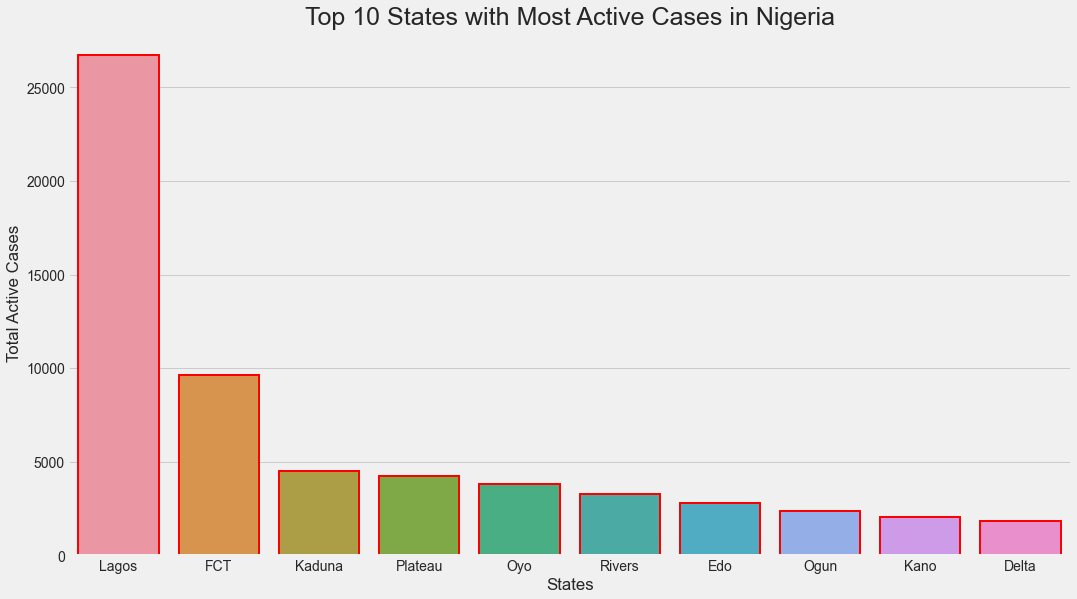

In [139]:
Top_10_Active_Cases = Final_Data.groupby(by = 'States').max(['LabConfirmed']).sort_values(by = ['LabConfirmed'], ascending = False).reset_index()
fig = plt.figure(figsize=(16,9))
plt.title('Top 10 States with Most Active Cases in Nigeria', size = 25)
ax = sns.barplot(data = Top_10_Active_Cases.iloc[:10], y = 'LabConfirmed', x = 'States', linewidth = 2, edgecolor = 'red')


plt.xlabel('States')
plt.ylabel('Total Active Cases')
plt.show()

## From the plot above, Lagos State had the highest of the Active Cases

TODO B - Generate a plot that shows the Top 10 states in terms of Discharged Covid cases. Hint - Sort the values

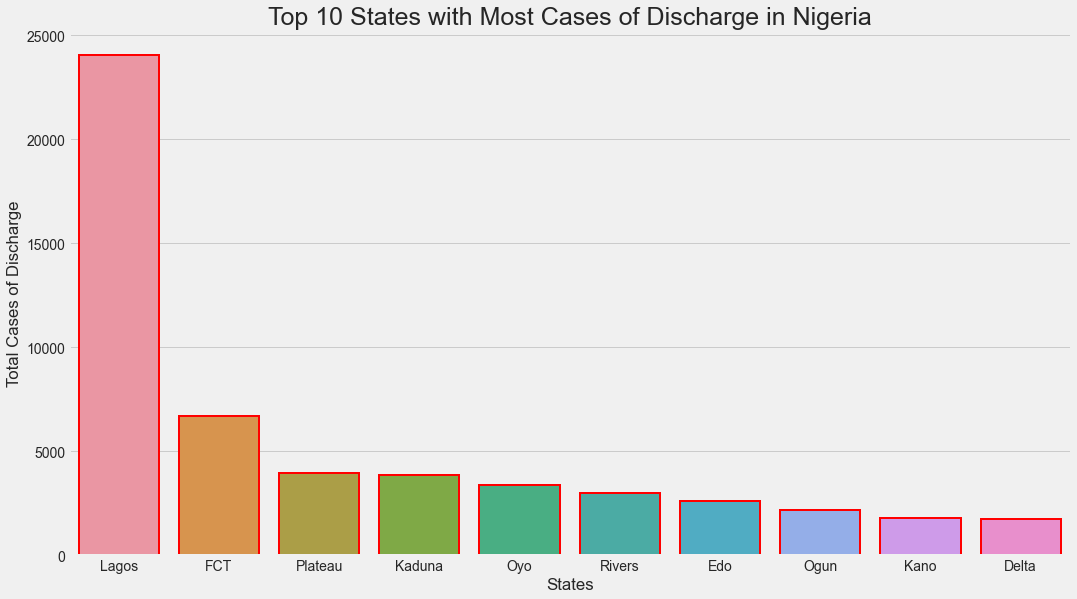

In [140]:
Top_10_Discharge_Cases = Final_Data.groupby(by = 'States').max(['Discharged']).sort_values(by = ['Discharged'], ascending = False).reset_index()

fig = plt.figure(figsize=(16,9))
plt.title('Top 10 States with Most Cases of Discharge in Nigeria', size = 25)
ax = sns.barplot(data = Top_10_Discharge_Cases.iloc[:10], y = 'Discharged', x = 'States', linewidth = 2, edgecolor = 'red')


plt.xlabel('States')
plt.ylabel('Total Cases of Discharge')
plt.show()

## The Plot above also shows that Lagos had the most discharge cases

TODO D - Plot the top 10 Death cases

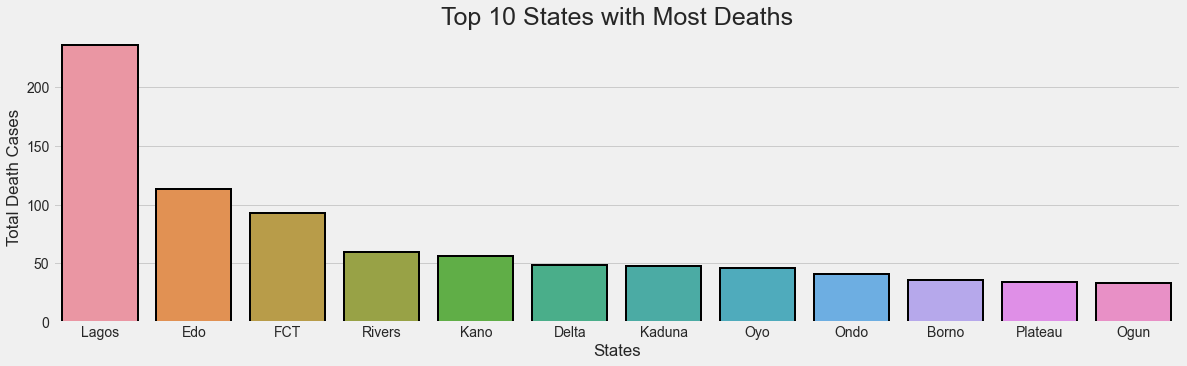

In [141]:
#Top States with Highest Deaths

top_10_deaths = Final_Data.groupby(by = 'States').max()[['Deaths']].sort_values(by = ['Deaths'], ascending = False).reset_index()

fig = plt.figure(figsize=(18,5))

plt.title("Top 10 States with Most Deaths", size = 25)

ax = sns.barplot(data = top_10_deaths.iloc[:12], y = "Deaths", x = "States", linewidth = 2, edgecolor = 'black')

plt.xlabel("States")
plt.ylabel("Total Death Cases")
plt.show()

## Most of the Death Cases also Came from Lagos

TODO E - Generate a line plot for the total daily confirmed, recovered and death cases in Nigeria

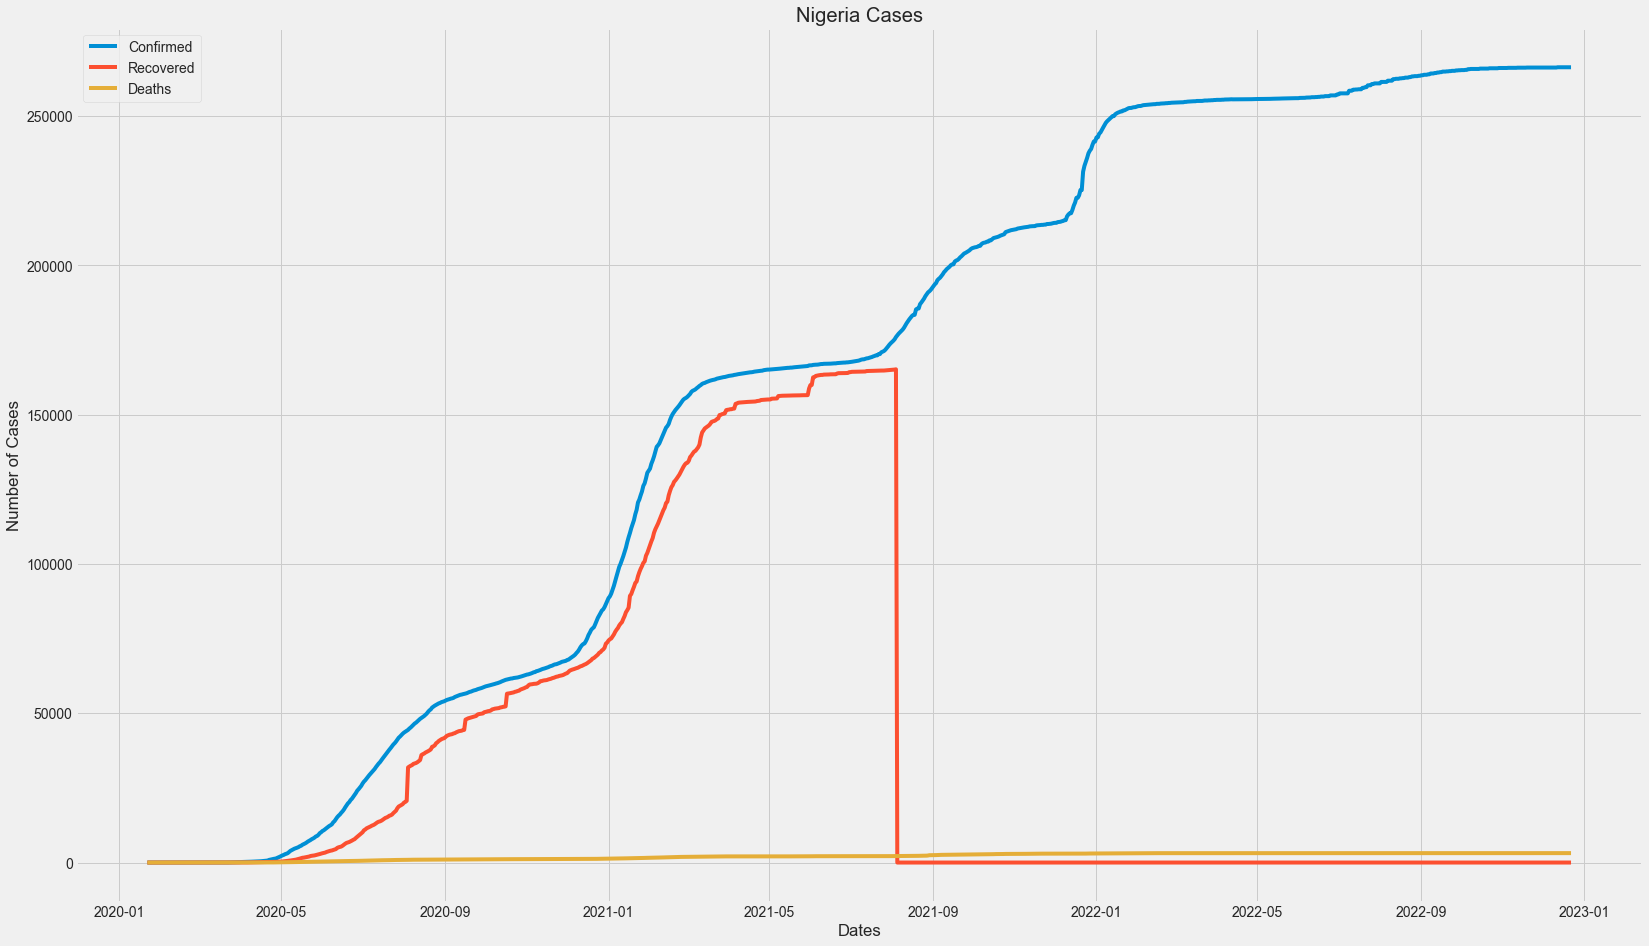

In [142]:
plt.subplots(figsize=(25,15))
plt.plot(Nigeria['Date'], Nigeria['Confirmed'], label = 'Confirmed')
plt.plot(Nigeria['Date'], Nigeria['Recovered'], label = 'Recovered')
plt.plot(Nigeria['Date'], Nigeria['Deaths'], label = 'Deaths')

plt.title('Nigeria Cases')
plt.xlabel('Dates')
plt.ylabel('Number of Cases')
plt.legend()

## The plot above shows that:

## 1. There has been an increase in the number of confirmed cases.
## 2. The number of recoveries steadily increased from May 2020 to August 2021 (where there was a stalemate) and then a decrease.
## 3. The number of death cases did not experience any significant surge right from January 2020 till December 2022.


TODO F - 
* Determine the daily infection rate, you can use the Pandas `diff` method to find the derivate of the total cases.
* Generate a line plot for the above

In [143]:
Nigeria['Infection Rate']= Nigeria['Confirmed'].diff()

In [144]:
infection_rate = Nigeria[['Date', 'Infection Rate']]

In [145]:
infection_rate

,Date,Infection Rate
Country,,
Nigeria,2020-01-22,NaN
Nigeria,2020-01-23,0.0
Nigeria,2020-01-24,0.0
Nigeria,2020-01-25,0.0
Nigeria,2020-01-26,0.0
...,...,...
Nigeria,2022-12-18,0.0
Nigeria,2022-12-19,0.0
Nigeria,2022-12-20,0.0


Text(0, 0.5, 'Number of Cases')

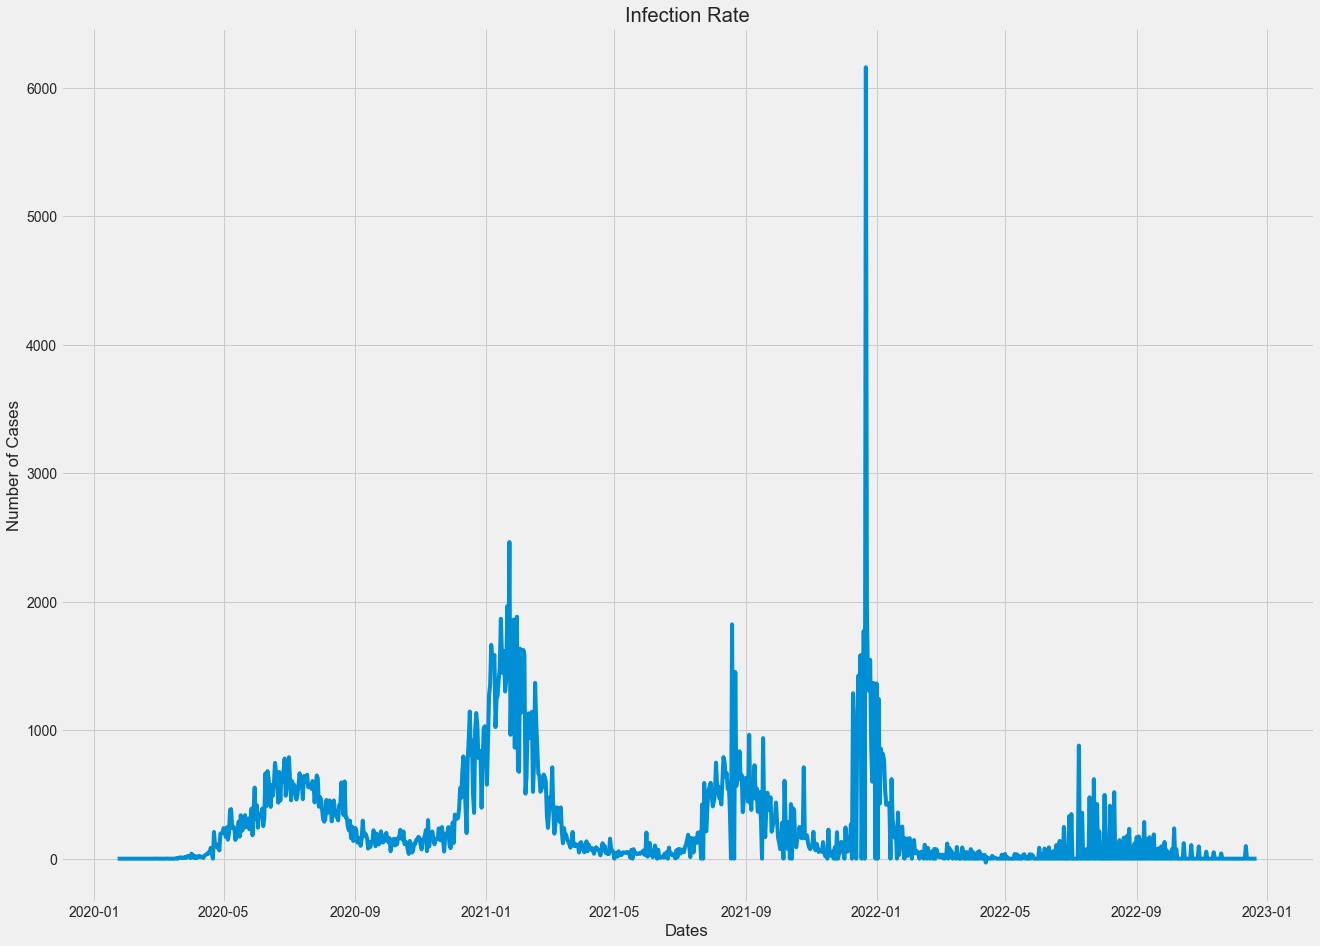

In [146]:
fig,ax=plt.subplots(figsize=(20,15))
plt.plot(Nigeria['Date'], Nigeria['Infection Rate'])

plt.title('Infection Rate')
plt.xlabel('Dates')
plt.ylabel('Number of Cases')


## In 2020, the highest infection rate was in July.
## In 2021, the highest infection rate was around February.
## In 2022, the highest infection rate was in January.

TODO G - 
* Calculate maximum infection rate for a day (Number of new cases)
* Find the date

In [147]:
Nigeria['Infection Rate'].max()

6158.0

In [148]:
Nigeria[Nigeria['Infection Rate']==Nigeria['Infection Rate'].max()]['Date']

Country
Nigeria   2021-12-22
Name: Date, dtype: datetime64[ns]

TODO H - Determine the relationship between the external dataset and the NCDC COVID-19 dataset. 
Here you will generate a line plot of top 10 confirmed cases and the overall community vulnerability index on the same axis. From the graph, explain your observation.
<br>
Steps
* Combine the two dataset together on a common column(states)
* Create a new dataframe for plotting. This DataFrame will contain top 10 states in terms of confirmed cases i.e sort by confirmed cases. ** Hint: Check out Pandas [nlargest](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nlargest.html) function. This [tutorial](https://cmdlinetips.com/2019/03/how-to-select-top-n-rows-with-the-largest-values-in-a-columns-in-pandas/) can help out ** 
* Plot both variable on the same axis. Check out this [tutorial](http://kitchingroup.cheme.cmu.edu/blog/2013/09/13/Plotting-two-datasets-with-very-different-scales/)

In [149]:
Covid_Ext.head(20)

,States,region,Population,Overall_CCVI_Index,Age,Epidemiological,Fragility,Health_System,Population_Density,Socio_Economic,Transport Availability,Acute_IHR
0,FCT,North Central,4865000,0.3,0.0,0.9,0.4,0.6,0.9,0.6,0.2,0.79
1,Plateau,North Central,4766000,0.4,0.5,0.4,0.8,0.3,0.3,0.5,0.3,0.93
2,Kwara,North Central,3524000,0.3,0.4,0.3,0.2,0.4,0.2,0.6,0.7,0.93
3,Nassarawa,North Central,2783000,0.1,0.3,0.5,0.9,0.0,0.1,0.6,0.5,0.85
4,Niger,North Central,6260000,0.6,0.0,0.6,0.3,0.7,0.1,0.8,0.8,0.84
5,Benue,North Central,6376000,0.5,0.7,0.5,0.7,0.4,0.4,0.3,0.5,0.91
6,Kogi,North Central,4970000,0.1,0.3,0.2,0.5,0.5,0.4,0.3,0.6,0.87
7,Bauchi,North East,7270000,0.8,0.1,0.2,0.8,0.8,0.2,0.8,0.8,0.85
8,Gombe,North East,3692000,1.0,0.4,0.4,0.9,0.9,0.3,0.8,0.7,0.83
9,Borno,North East,6651000,0.9,0.3,0.1,1.0,1.0,0.1,0.7,0.9,0.89


In [150]:
Covidnig.head(15)

,States,LabConfirmed,AdmissionCases,Discharged,Deaths
0,Lagos,26708.0,2435.0,24037.0,236
1,FCT,9627.0,2840.0,6694.0,93
2,Kaduna,4504.0,579.0,3877.0,48
3,Plateau,4262.0,280.0,3948.0,34
4,Oyo,3788.0,368.0,3374.0,46
5,Rivers,3279.0,232.0,2987.0,60
6,Edo,2768.0,52.0,2603.0,113
7,Ogun,2382.0,174.0,2175.0,33
8,Kano,2032.0,198.0,1778.0,56
9,Delta,1843.0,57.0,1737.0,49


In [151]:
#Merge both datasets
Nig_Ext = pd.merge(Covidnig, Covid_Ext, on = "States")
Nig_Ext = Nig_Ext.sort_values("LabConfirmed", ascending = False)

Nig_Ext

,States,LabConfirmed,AdmissionCases,Discharged,Deaths,region,Population,Overall_CCVI_Index,Age,Epidemiological,Fragility,Health_System,Population_Density,Socio_Economic,Transport Availability,Acute_IHR
0,Lagos,26708.0,2435.0,24037.0,236,South West,13992000,0.0,0.1,1.0,0.3,0.1,1.0,0.1,0.4,0.93
1,FCT,9627.0,2840.0,6694.0,93,North Central,4865000,0.3,0.0,0.9,0.4,0.6,0.9,0.6,0.2,0.79
2,Kaduna,4504.0,579.0,3877.0,48,North West,9227000,0.7,0.1,0.9,0.8,0.9,0.4,0.6,0.4,0.86
3,Plateau,4262.0,280.0,3948.0,34,North Central,4766000,0.4,0.5,0.4,0.8,0.3,0.3,0.5,0.3,0.93
4,Oyo,3788.0,368.0,3374.0,46,South West,8737000,0.2,0.7,0.8,0.2,0.8,0.6,0.2,0.3,1.06
5,Rivers,3279.0,232.0,2987.0,60,South South,7763000,0.4,0.5,0.9,0.6,0.6,0.9,0.1,0.1,1.00
6,Edo,2768.0,52.0,2603.0,113,South South,4705000,0.1,0.9,0.8,0.1,0.1,0.5,0.4,0.3,1.09
7,Ogun,2382.0,174.0,2175.0,33,South West,5878000,0.3,0.6,0.7,0.5,0.6,0.6,0.0,0.2,1.07
8,Kano,2032.0,198.0,1778.0,56,North West,14726000,0.6,0.2,0.1,0.3,0.4,0.8,0.8,0.5,0.87
9,Delta,1843.0,57.0,1737.0,49,South South,6303000,0.4,0.6,0.7,0.2,1.0,0.6,0.5,0.4,1.08


In [152]:
#extract the coloumns to plot
Nig_Ext = Nig_Ext.nlargest(10, "LabConfirmed")
dat = Nig_Ext["States"], Nig_Ext["LabConfirmed"], Nig_Ext["Overall_CCVI_Index"]
header = ["States", "LabConfirmed", "Overall_CCVI_Index"]
Nig_Ext_plot = pd.concat(dat, axis = 1, keys = header)

In [153]:
Nig_Ext_plot

,States,LabConfirmed,Overall_CCVI_Index
0,Lagos,26708.0,0.0
1,FCT,9627.0,0.3
2,Kaduna,4504.0,0.7
3,Plateau,4262.0,0.4
4,Oyo,3788.0,0.2
5,Rivers,3279.0,0.4
6,Edo,2768.0,0.1
7,Ogun,2382.0,0.3
8,Kano,2032.0,0.6
9,Delta,1843.0,0.4


<AxesSubplot:>

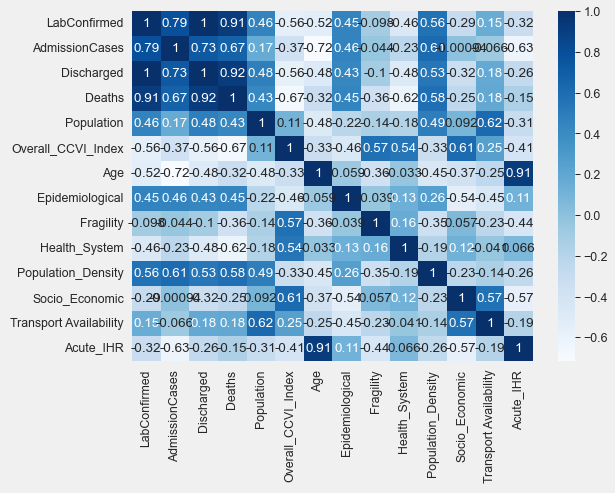

In [154]:
plt.figure(figsize=(8,6))
sns.set_context('paper', font_scale=1.4)

Nig_mx = Nig_Ext.corr()


sns.heatmap(Nig_mx, annot=True, cmap='Blues')


## The Heatmap shows the correlation between the variables

## From the map, the GREATEST factor affecting the Overall_CCVI_Index is the Social_Economic status of the affected states

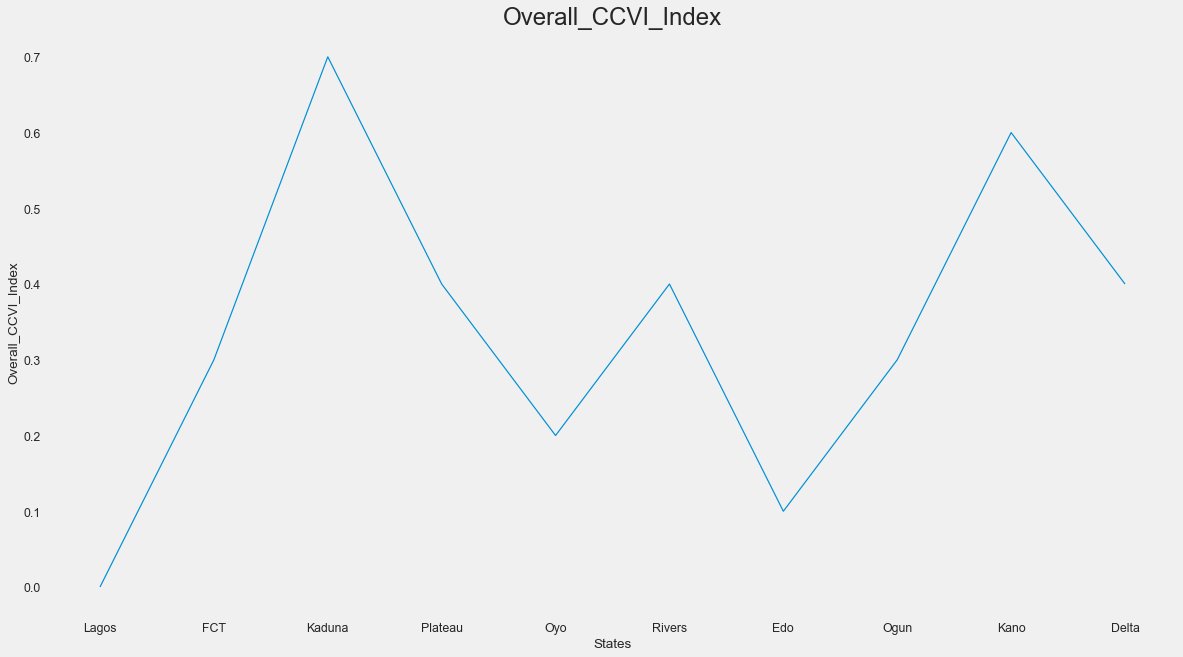

In [155]:
#Plot Map of Overral CCVI Index

y = Nig_Ext_plot["Overall_CCVI_Index"]
x = Nig_Ext_plot["States"]
z = Nig_Ext_plot["LabConfirmed"]

f = plt.figure()
f.set_figwidth(18)
f.set_figheight(10)
plt.xlabel("States")
plt.ylabel("Overall_CCVI_Index")
plt.title(label="Overall_CCVI_Index", fontsize=24)
plt.grid()
plt.plot(x, y, label = "Overall_CCVI_Index")
sns.despine()
plt.show()

## The plot above shows that most states with the highest Overall_CCVI_Index were from the North

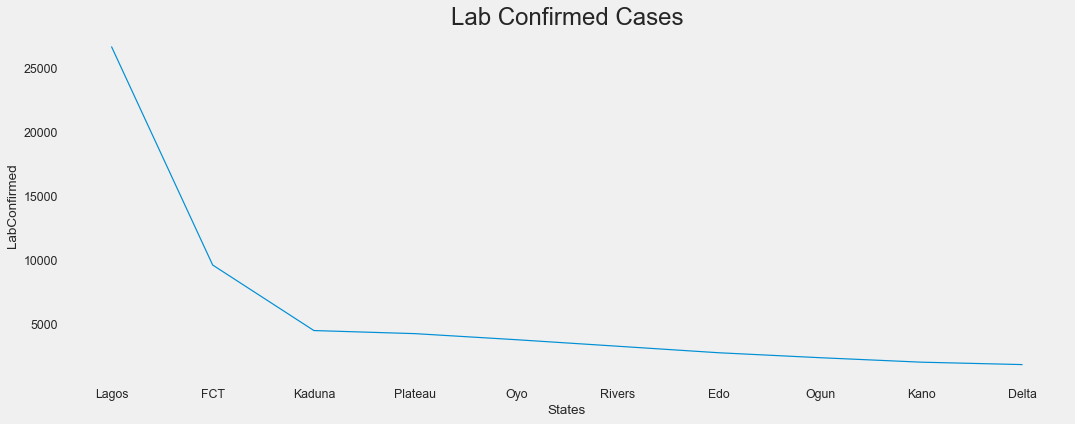

In [156]:
#Plot map of Lab Confirmed cases
f = plt.figure()
f.set_figwidth(16)
f.set_figheight(6)
plt.xlabel("States")
plt.ylabel("LabConfirmed")
plt.title(label="Lab Confirmed Cases", fontsize=24)
plt.grid()
sns.despine()
plt.plot(x, z, label = "LabConfirmed")

## Lagos had the highest number of Confirmed Cases, most likely because of the availability of sufficient test kits

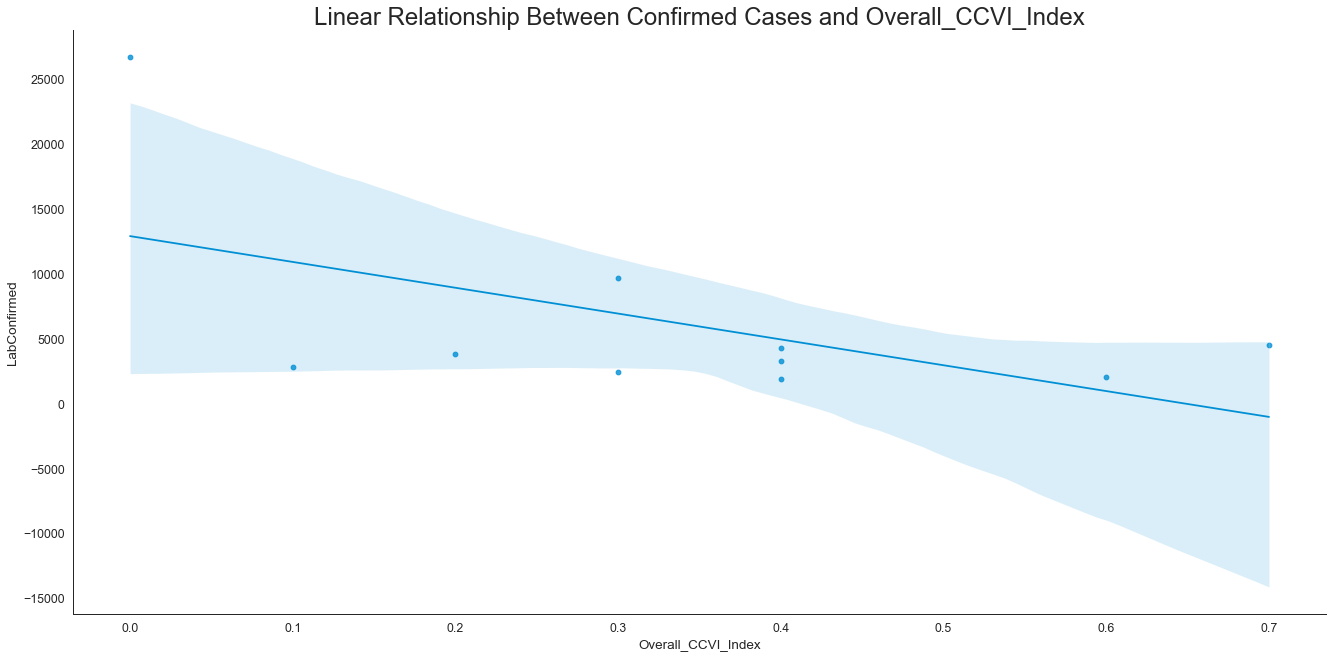

In [157]:
#ncdc_ext = sns.load_dataset("ncdc_external")
sns.set_style("white")
d = plt.figure(figsize=(20,10))
plt.title(label="Linear Relationship Between Confirmed Cases and Overall_CCVI_Index", fontsize=24)
ax = sns.regplot(y = "LabConfirmed", x = "Overall_CCVI_Index", data = Nig_Ext)
#plt.ylim(0,1.2)
sns.despine()

## The plot above shows that there is alomost no correlation between the Confirmed Cases and the Overall_CCVI_Index

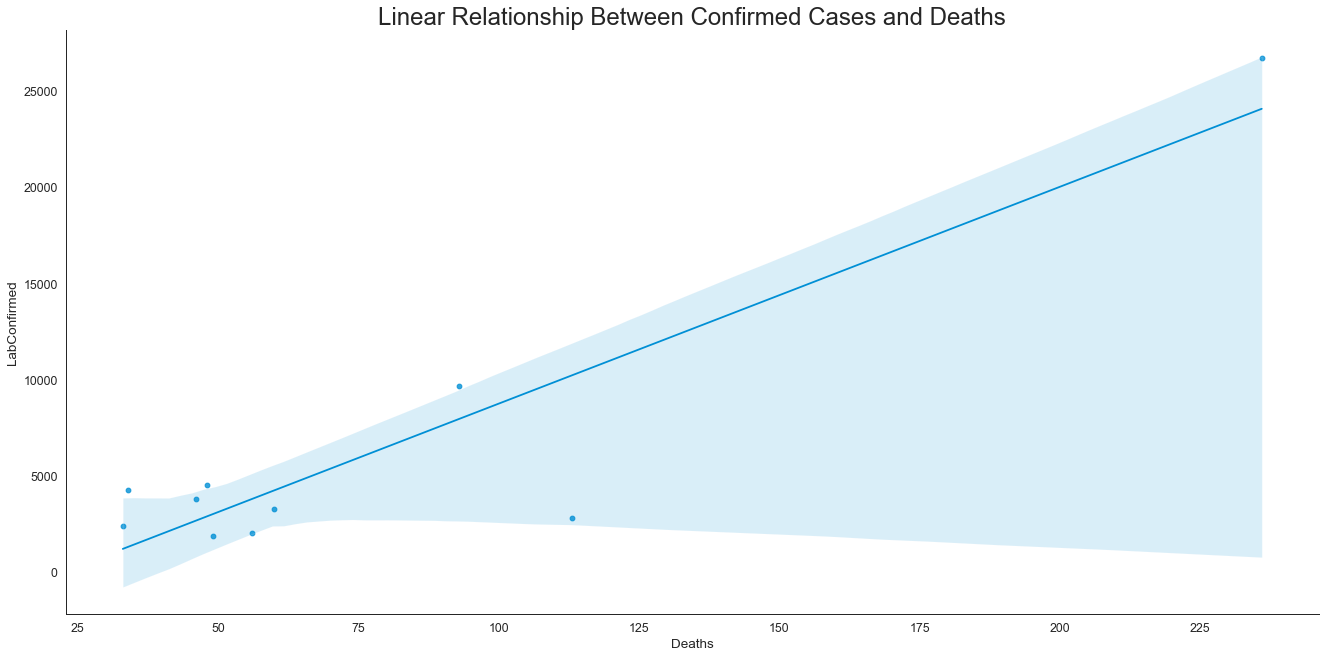

In [158]:

sns.set_style("white")
d = plt.figure(figsize=(20,10))
plt.title(label="Linear Relationship Between Confirmed Cases and Deaths", fontsize=24)
ax = sns.regplot(y = "LabConfirmed", x = "Deaths", data = Nig_Ext)
#plt.ylim(0,1.2)
sns.despine()

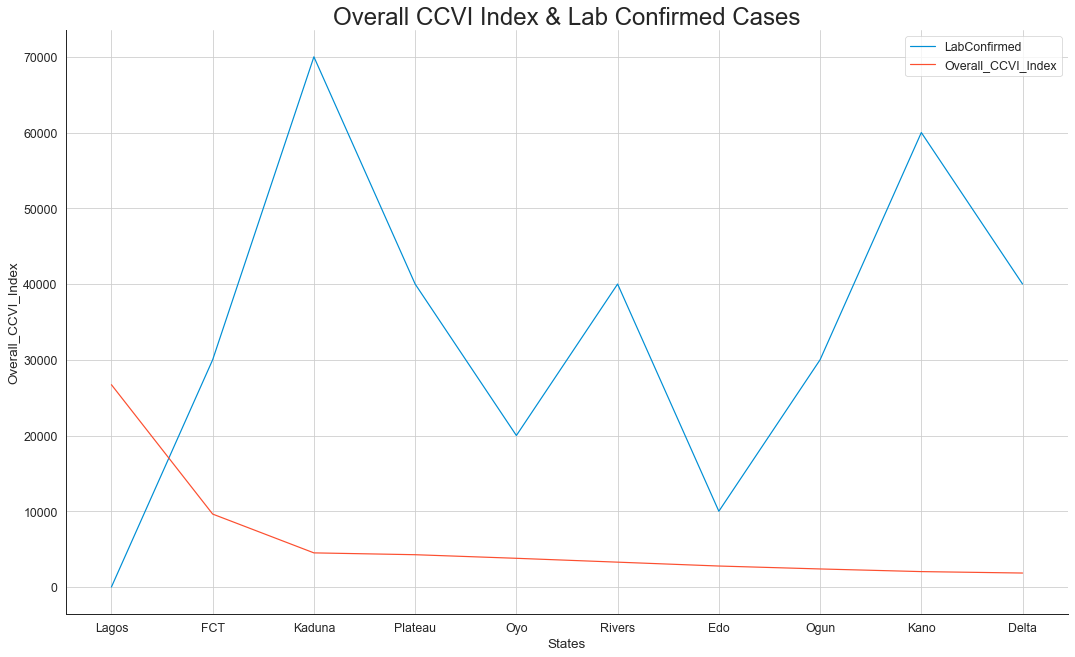

In [159]:
y = Nig_Ext_plot["Overall_CCVI_Index"]
x = Nig_Ext_plot["States"]
z = Nig_Ext_plot["LabConfirmed"]

d = plt.figure(figsize=(16,10))
plt.grid()

fii = sns.lineplot(x, 100000*y, data = Nig_Ext_plot, sort = False)
plt.title(label="Overall CCVI Index & Lab Confirmed Cases", fontsize=24)
sns.lineplot(x, z, data = Nig_Ext_plot, sort = False)
fii.legend(["LabConfirmed", "Overall_CCVI_Index"])
sns.despine()

## The plots above show that though Kaduna and Kano states had the high Overall_CCVI_Indices (most likely as a result of low Social_economic Status), the highest number of LabConfirmed cases came from Lagos.



TODO I - Determine the relationship between the external dataset and the NCDC COVID-19 dataset. 
* Here you will generate a regression plot between two variables to visualize the linear relationships - Confirmed Cases and Population Density.
Hint: Check out Seaborn [Regression Plot](https://seaborn.pydata.org/generated/seaborn.regplot.html).
* Provide a summary of your observation

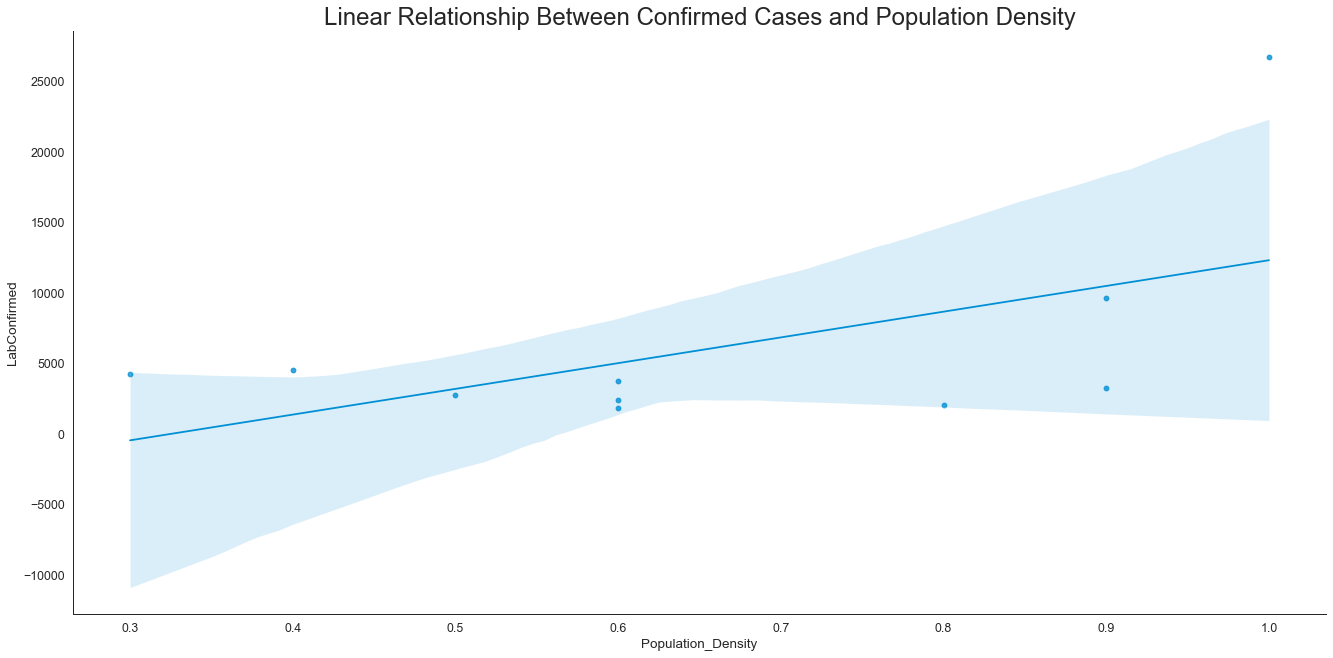

In [160]:

sns.set_style("white")
d = plt.figure(figsize=(20,10))
plt.title(label="Linear Relationship Between Confirmed Cases and Population Density", fontsize=24)
ax = sns.regplot(y = "LabConfirmed", x = "Population_Density", data = Nig_Ext)
#plt.ylim(0,1.2)
sns.despine()

## There exists a moderately positive correlation between the Laboratory Confirmed Cases and the Population Density

TODO J - 
* Provide more analyses by extending TODO G & H. Meaning, determine relationships between more features.
* Provide a detailed summary of your findings. 
* Note that you can have as many as possible.

In [161]:
Covidnig

,States,LabConfirmed,AdmissionCases,Discharged,Deaths
0,Lagos,26708.0,2435.0,24037.0,236
1,FCT,9627.0,2840.0,6694.0,93
2,Kaduna,4504.0,579.0,3877.0,48
3,Plateau,4262.0,280.0,3948.0,34
4,Oyo,3788.0,368.0,3374.0,46
5,Rivers,3279.0,232.0,2987.0,60
6,Edo,2768.0,52.0,2603.0,113
7,Ogun,2382.0,174.0,2175.0,33
8,Kano,2032.0,198.0,1778.0,56
9,Delta,1843.0,57.0,1737.0,49


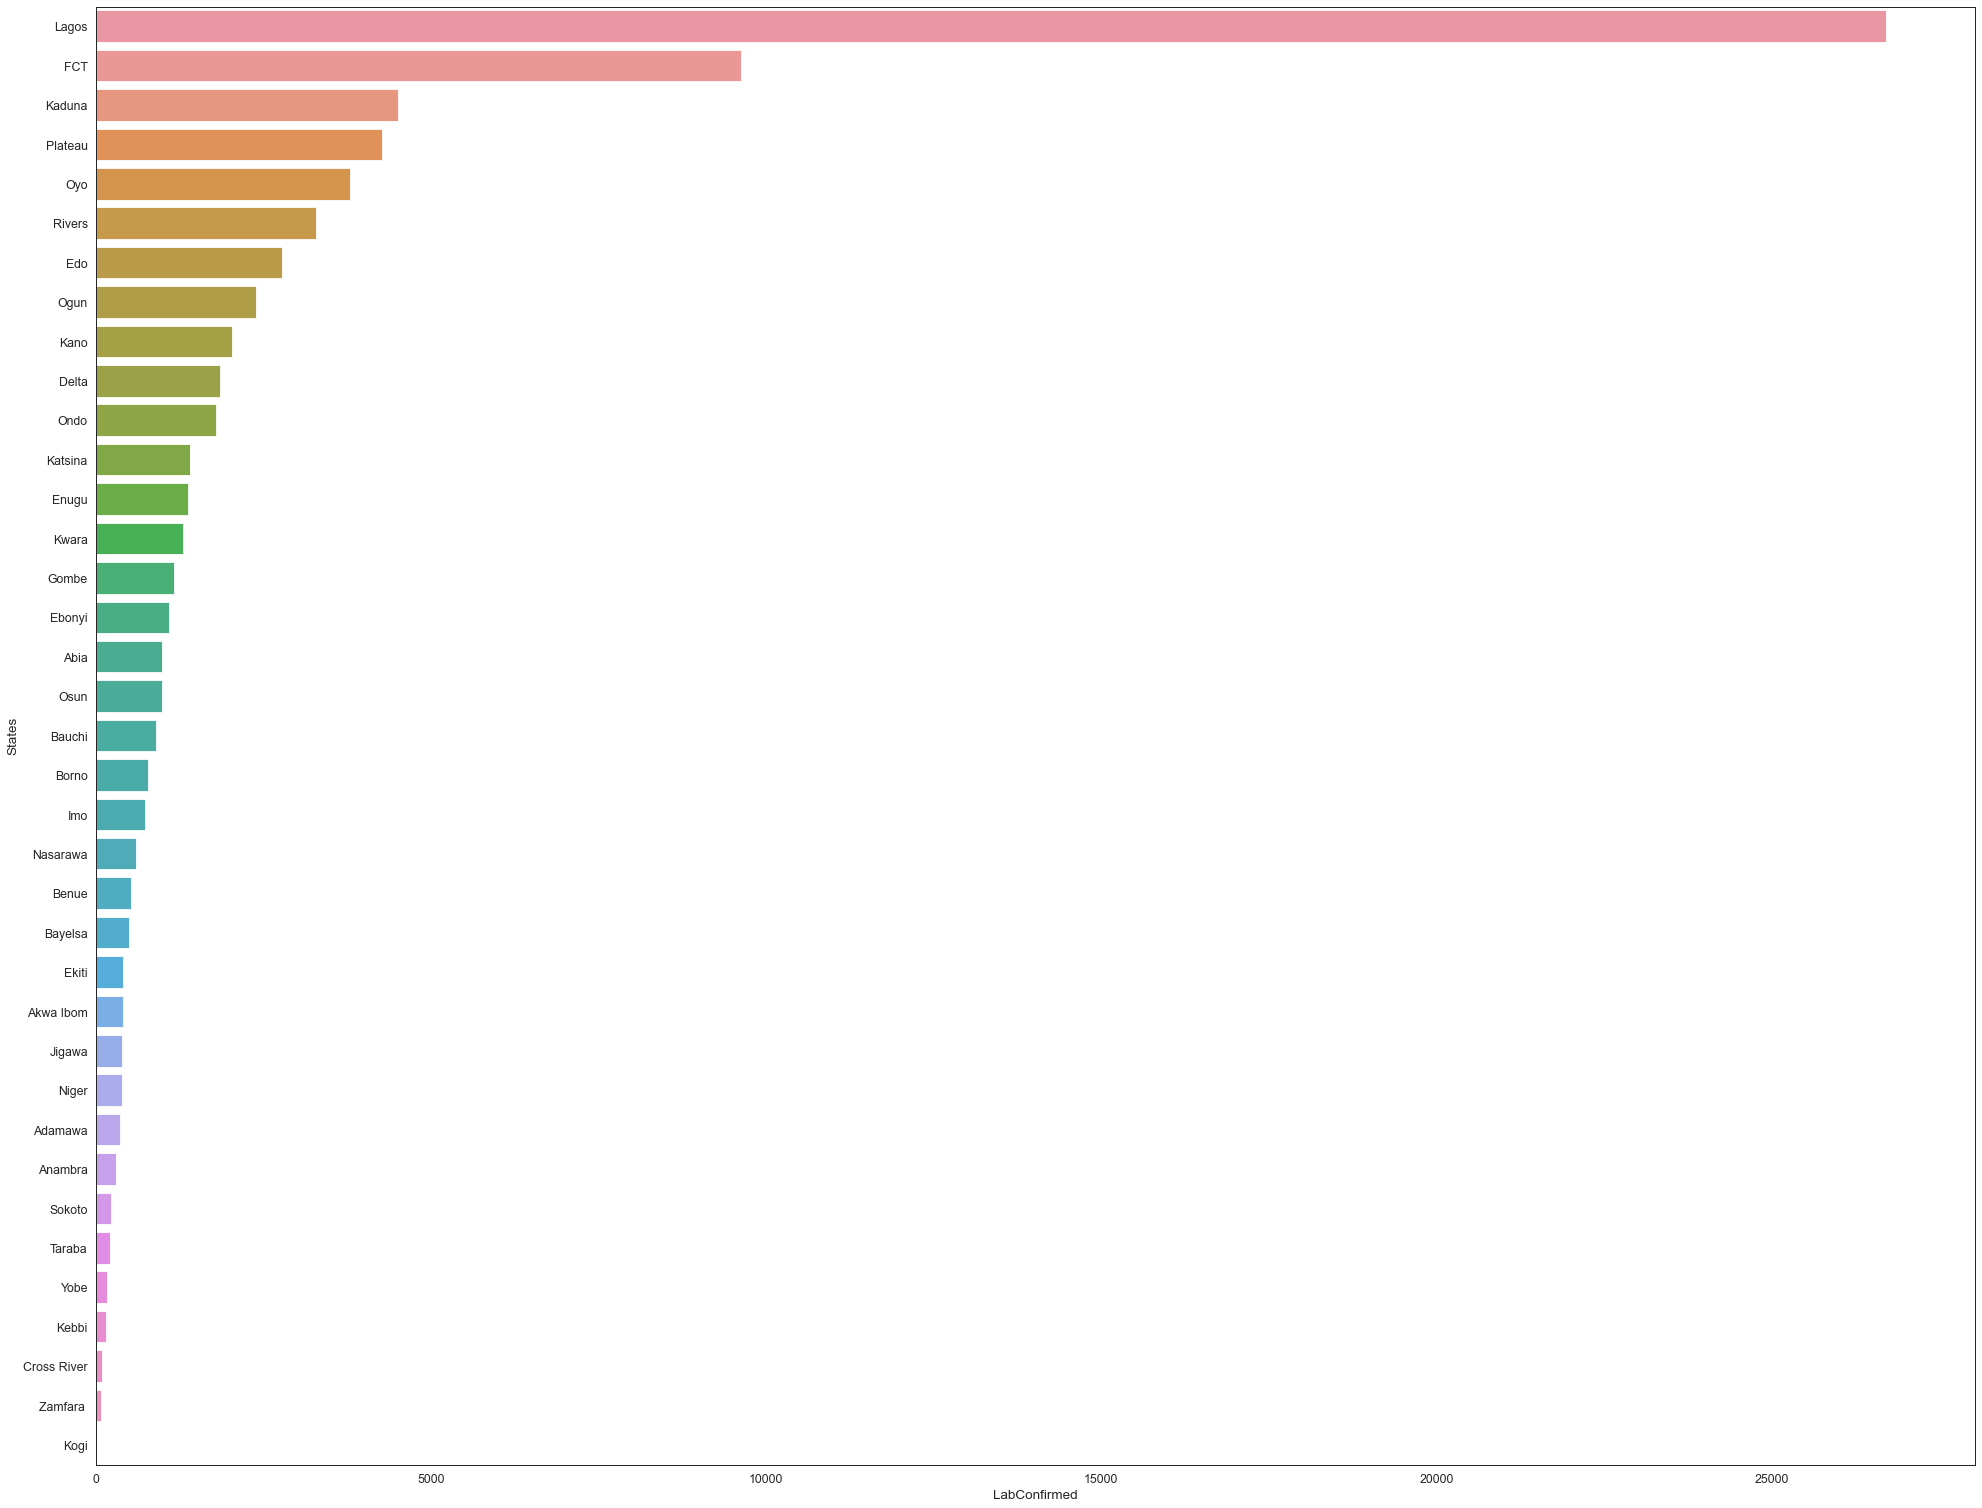

In [162]:
fig,ax=plt.subplots(figsize=(30,25))
sns.barplot(y='States',x='LabConfirmed', data = Covidnig)
plt.savefig('Confirmed')

## LAGOS, with the highest population had the highest number of confirmed cases

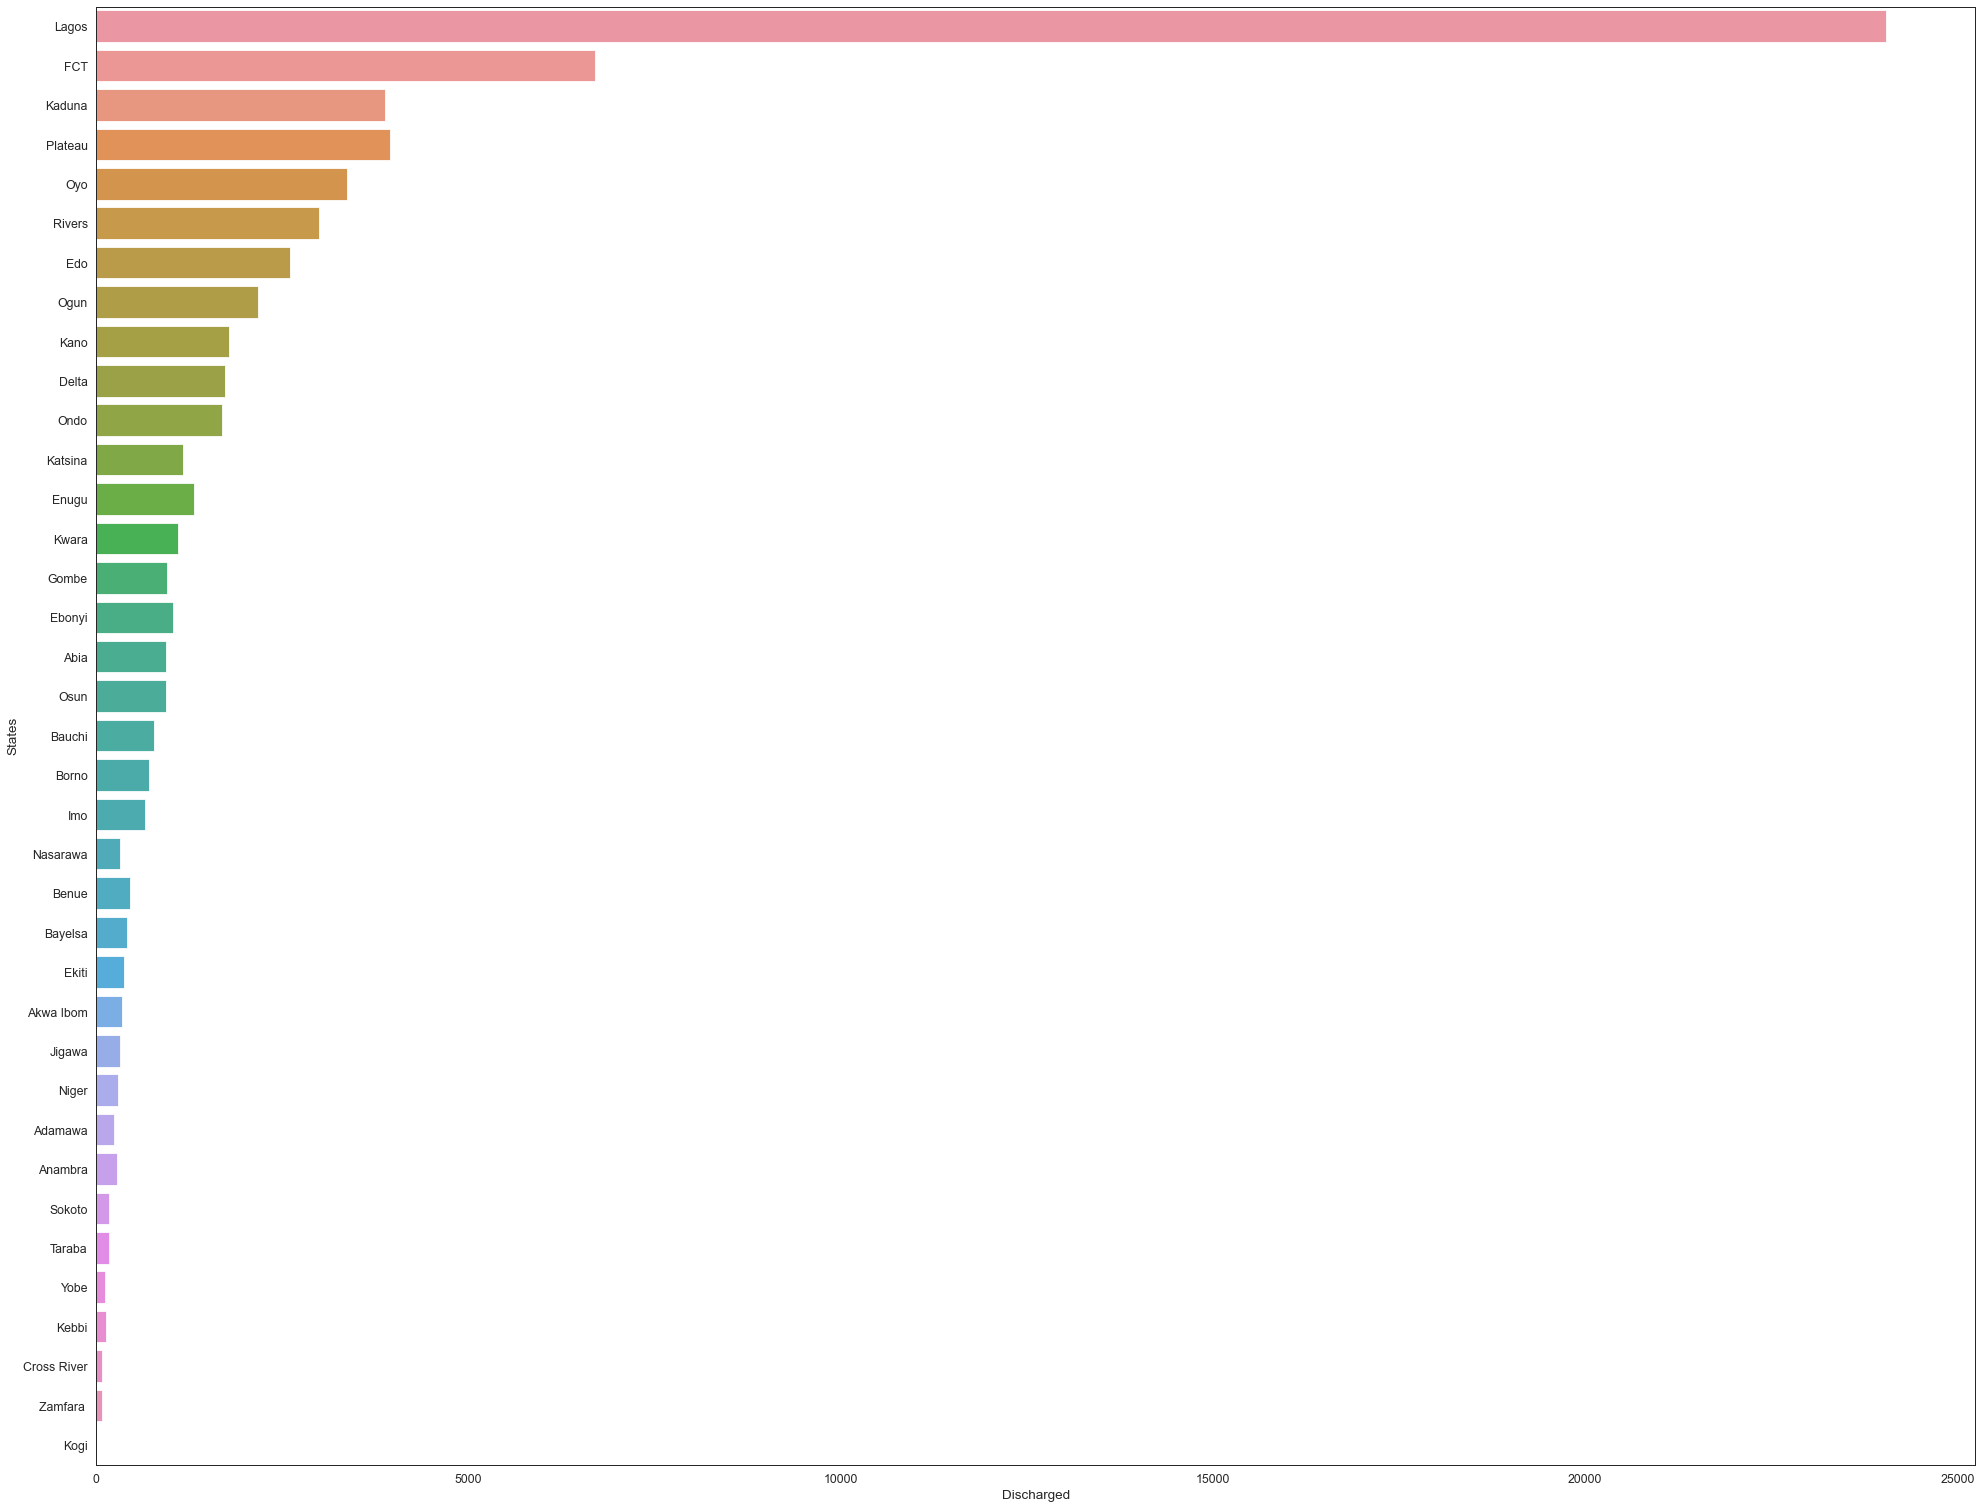

In [163]:
fig,ax=plt.subplots(figsize=(30,25))
sns.barplot(x='Discharged',y='States',data = Covidnig)
plt.savefig('Discharged')

## The states with the highest number of Laboratory Confirmed Cases had the highest number of Discharges

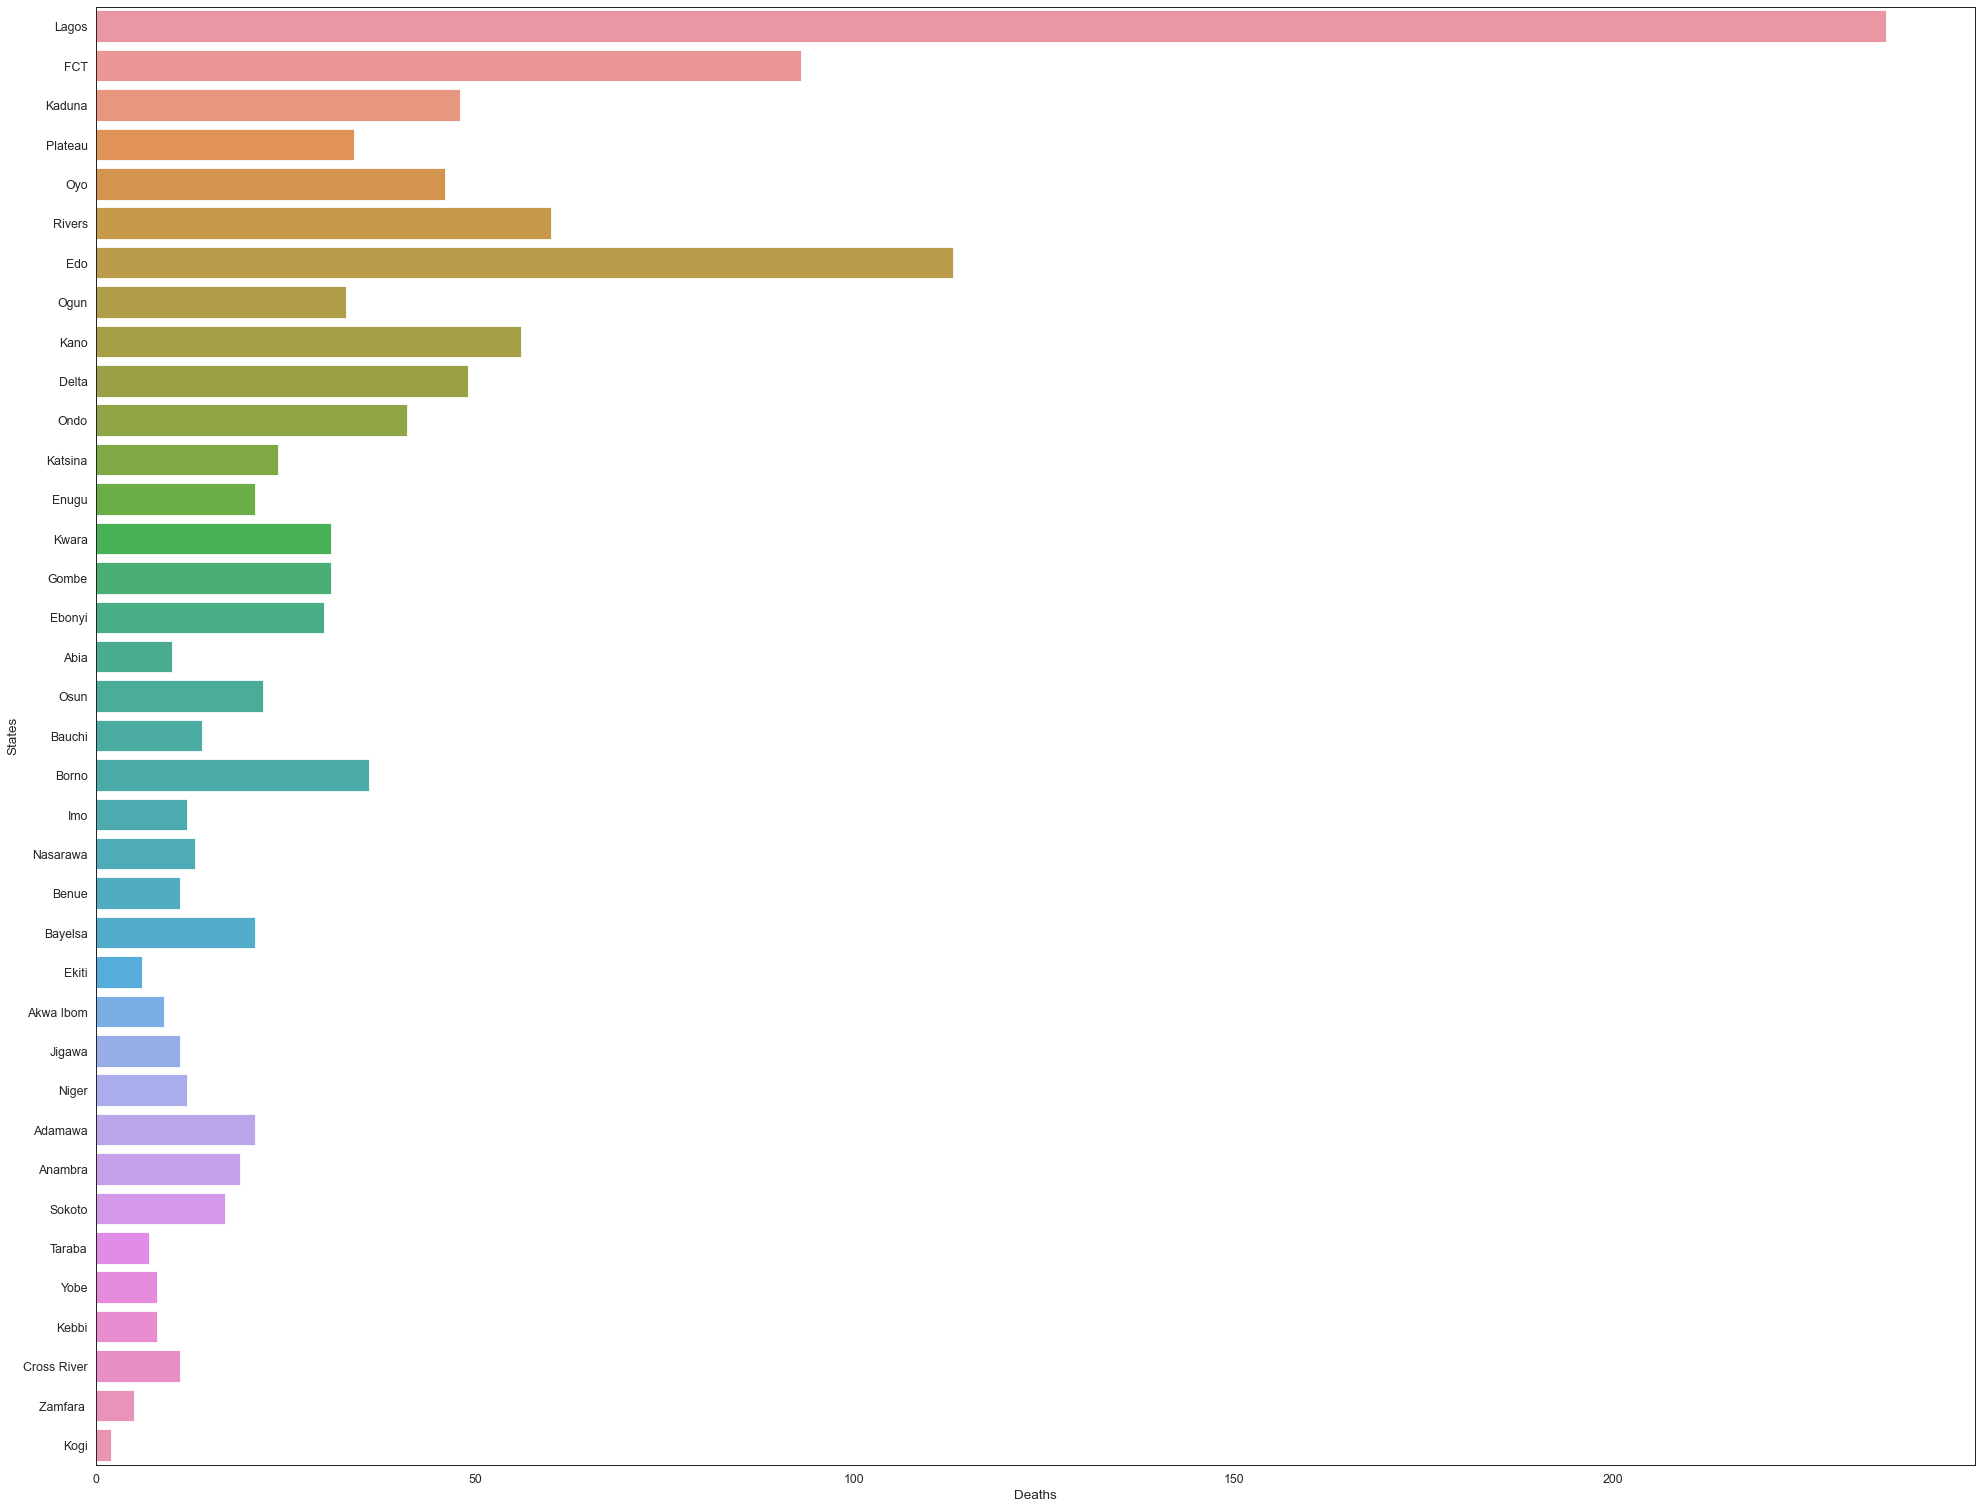

In [164]:
fig,ax=plt.subplots(figsize=(30,25))
sns.barplot(x='Deaths',y='States',data = Covidnig)
plt.savefig('Deaths')

### TODO L - 
Determine the effect of the Pandemic on the economy. To do this, you will compare the Real GDP value Pre-COVID-19 with Real GDP in 2020 (COVID-19 Period, especially Q2 2020)
<br>
Steps
* From the Real GDP Data, generate a `barplot` using the GDP values for each year & quarters. For example: On x-axis you will have year 2017 and the bars will be values of each quarters(Q1-Q4). You expected to have subplots of each quarters on one graph.
<br>
Hint: Use [Pandas.melt](https://pandas.pydata.org/docs/reference/api/pandas.melt.html) to create your plot DataFrame 
* Set your quarter legend to lower left.
* Using `axhline`, draw a horizontal line through the graph at the value of Q2 2020.
* Write out your observation

In [165]:
RealGDP_Data

,Year,Q1,Q2,Q3,Q4
0,2014,15438679.50,16084622.31,17479127.58,18150356.45
1,2015,16050601.38,16463341.91,17976234.59,18533752.07
2,2016,15943714.54,16218542.41,17555441.69,18213537.29
3,2017,15797965.83,16334719.27,17760228.17,18598067.07
4,2018,16096654.19,16580508.07,18081342.10,19041437.59
5,2019,16434552.65,16931434.89,18494114.17,19530000.00
6,2020,16740000.00,15890000.00,17820000.00,0.00


In [166]:
#melt the data
RealGDP_Melted = RealGDP_Data.melt(id_vars ="Year")


In [167]:
RealGDP_Melted

,Year,variable,value
0,2014,Q1,15438679.50
1,2015,Q1,16050601.38
2,2016,Q1,15943714.54
3,2017,Q1,15797965.83
4,2018,Q1,16096654.19
5,2019,Q1,16434552.65
6,2020,Q1,16740000.00
7,2014,Q2,16084622.31
8,2015,Q2,16463341.91
9,2016,Q2,16218542.41


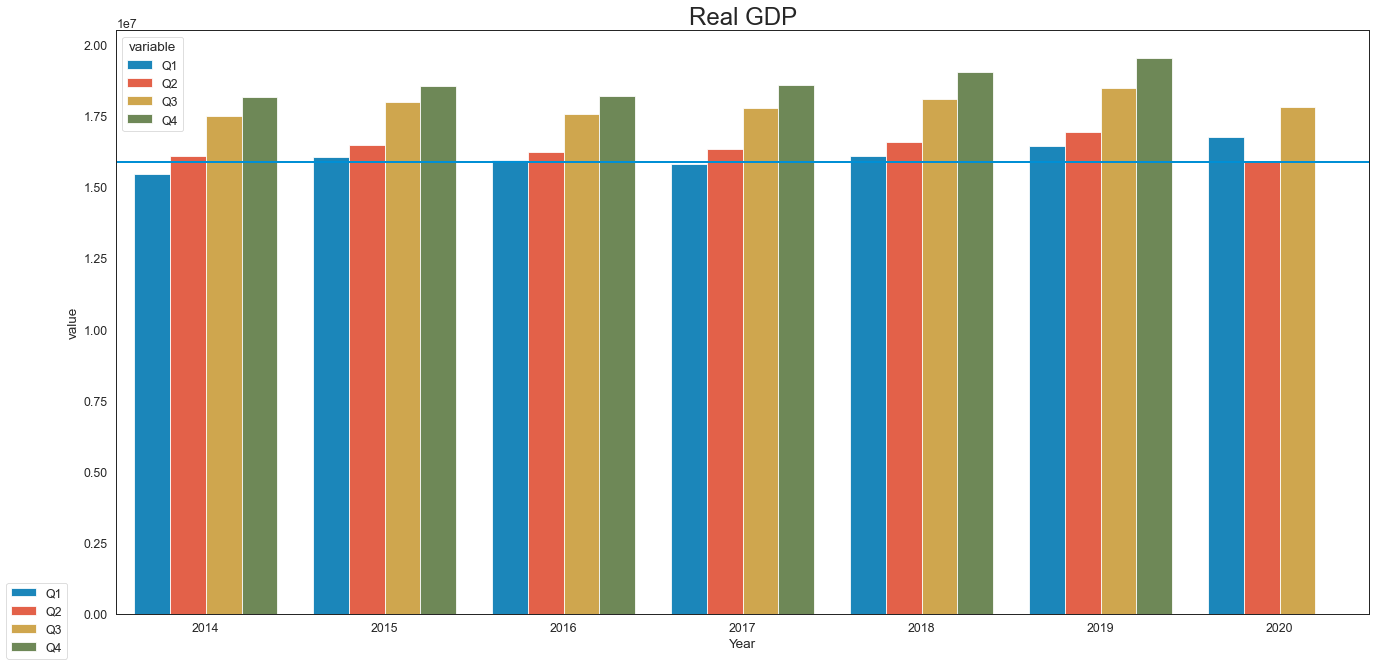

In [168]:
#sns.set_style("white")
D = plt.figure(figsize=(20,10))
graph = sns.barplot(data = RealGDP_Melted, x = "Year", y = "value", hue = "variable")
plt.title(label="Real GDP", fontsize=24)
graph.axhline(y = 15890000.00, linewidth = 2)
#plt.grid()
D.legend(loc="lower left")
plt.show()

### Note: Do not limit your analysis to the provided TODOs. Perform more analyses e.g 
* Check for more external dataset
* Ask more questions & find the right answers by exploring the data

In [169]:
#Check Budget Dataset
Budget_Data

,States,Initial_Budget,Revised_Budget(Bn)
0,Abia,136.60,102.70
1,Adamawa,183.30,139.31
2,Akwa-Ibom,597.73,366.00
3,Anambra,137.10,112.80
4,Bauchi,167.20,128.00
5,Bayelsa,242.18,183.15
6,Benue,189.00,119.00
7,Borno,146.80,108.80
8,Cross River,1100.00,147.10
9,Delta,395.50,282.30


In [170]:
Budget_Data['Percentage Change In Budget(%)']=(Budget_Data['Initial_Budget'] - Budget_Data['Revised_Budget(Bn)'])/(Budget_Data['Initial_Budget']) * 100

In [171]:
Budget_Data

,States,Initial_Budget,Revised_Budget(Bn),Percentage Change In Budget(%)
0,Abia,136.60,102.70,24.816984
1,Adamawa,183.30,139.31,23.998909
2,Akwa-Ibom,597.73,366.00,38.768340
3,Anambra,137.10,112.80,17.724289
4,Bauchi,167.20,128.00,23.444976
5,Bayelsa,242.18,183.15,24.374432
6,Benue,189.00,119.00,37.037037
7,Borno,146.80,108.80,25.885559
8,Cross River,1100.00,147.10,86.627273
9,Delta,395.50,282.30,28.621997


In [172]:
Budget_Data['Percentage Change In Budget(%)'].mean()

29.769165627276895

In [173]:

Budget_Data[Budget_Data['Percentage Change In Budget(%)']==Budget_Data['Percentage Change In Budget(%)'].min()]

,States,Initial_Budget,Revised_Budget(Bn),Percentage Change In Budget(%)
19,Katsina,244.0,213.0,12.704918


In [174]:
Budget_Data[Budget_Data['Percentage Change In Budget(%)']==Budget_Data['Percentage Change In Budget(%)'].max()]

,States,Initial_Budget,Revised_Budget(Bn),Percentage Change In Budget(%)
8,Cross River,1100.0,147.1,86.627273


<AxesSubplot:xlabel='Initial_Budget', ylabel='States'>

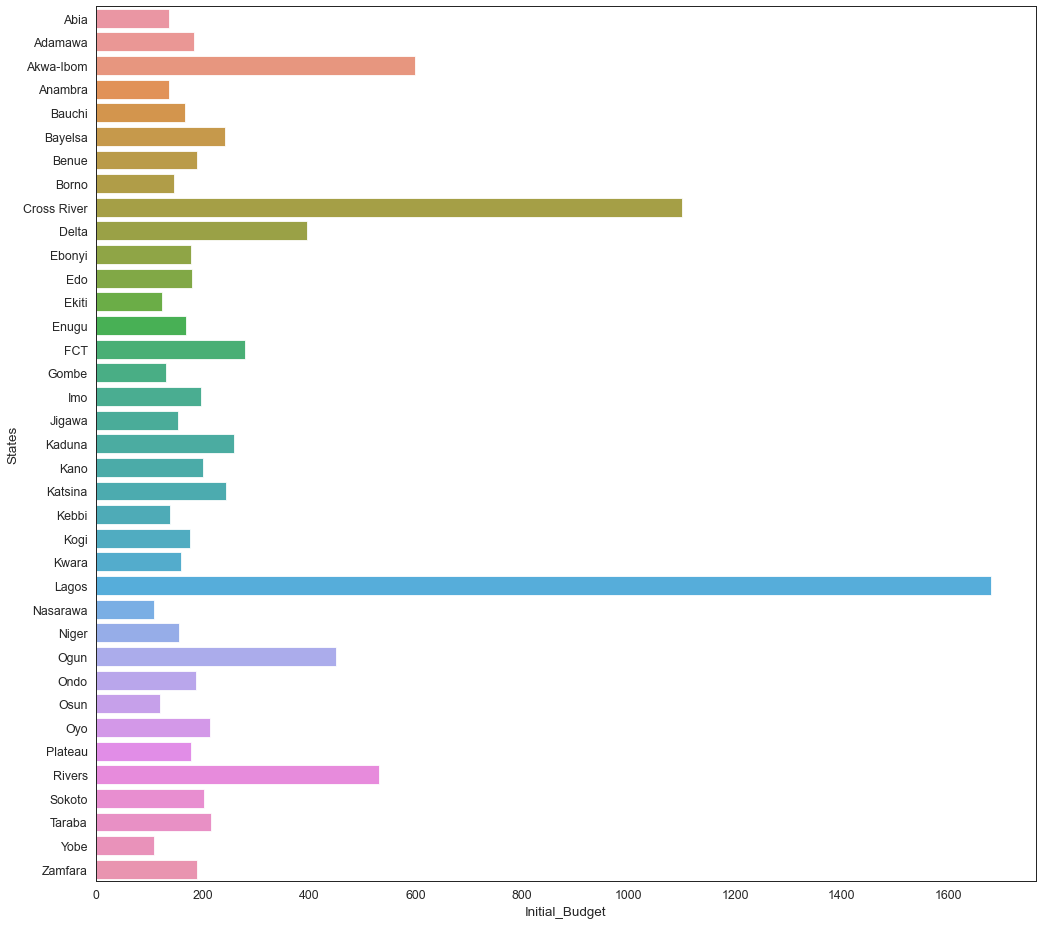

In [175]:

fig,ax=plt.subplots(figsize=(15,15))
sns.barplot(y='States', x='Initial_Budget', data = Budget_Data)

<AxesSubplot:xlabel='Revised_Budget(Bn)', ylabel='States'>

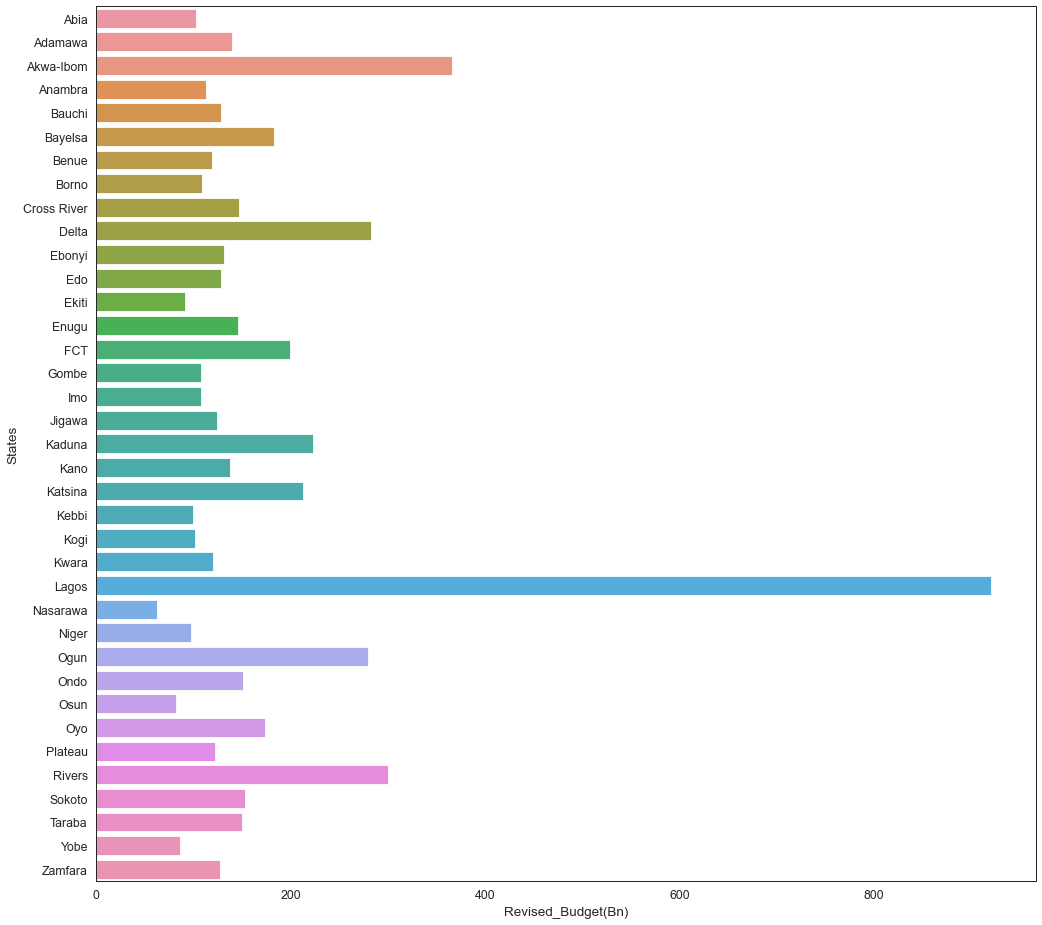

In [176]:
fig,ax=plt.subplots(figsize=(15,15))
sns.barplot(y ='States', x ='Revised_Budget(Bn)', data = Budget_Data)



Text(0.5, 1.0, 'Percent Budget Change')

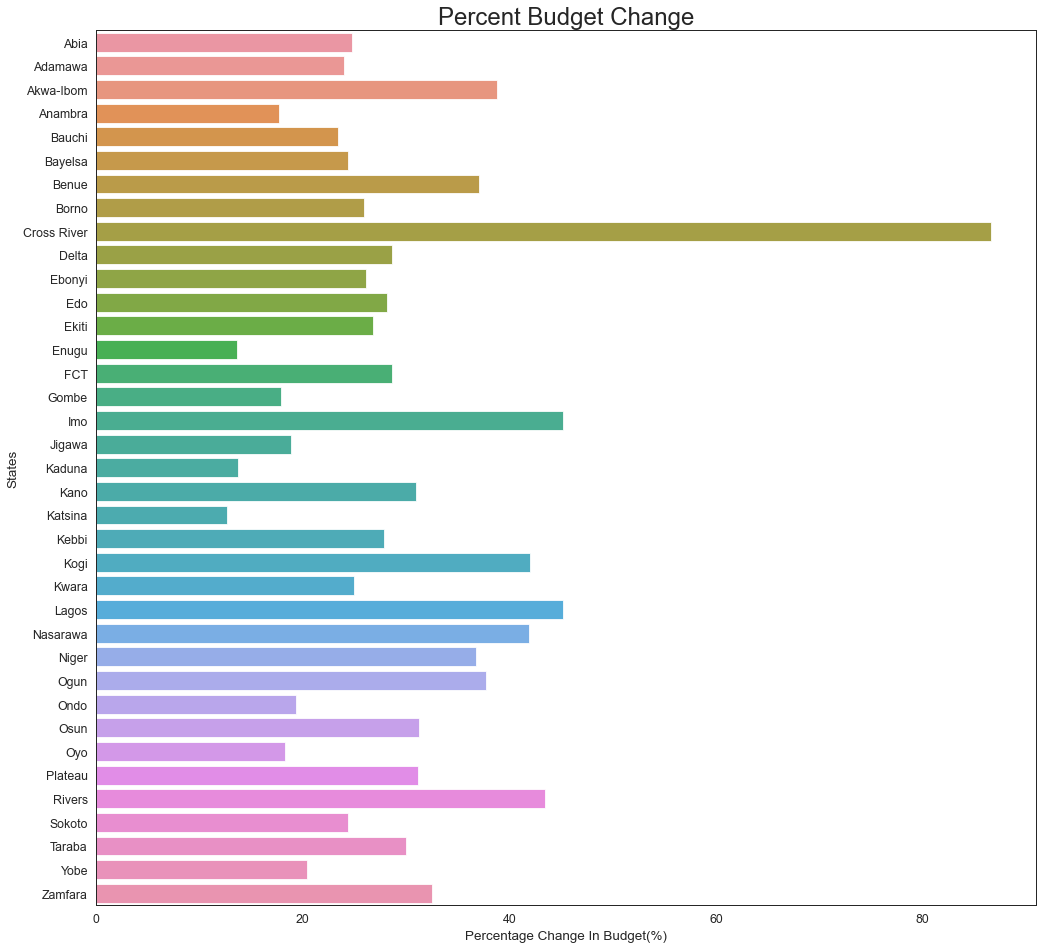

In [177]:
fig,ax=plt.subplots(figsize=(15,15))
sns.barplot(y ='States', x ='Percentage Change In Budget(%)',data = Budget_Data)
plt.title(label= "Percent Budget Change", fontsize=24)

## The Highest percentage change in budget came from Cross River State (87%)

## The Lowest percentage change in budget came from Katsina State (13%)